In [21]:
from astropy.table import Table
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy import stats
import pickle
from astropy.io import fits

np.set_printoptions(threshold=sys.maxsize)

In [22]:
matplotlib.rcParams['text.usetex']=True


### New depths

In [23]:
hd = fits.open('galdepth5.fits', format='ascii')
new_depths = Table(hd[1].data) # depth_norm : 0 at the edge of a void to 1 at the deepest.

In [24]:
new_depths = Table(hd[1].data) # depth_norm : 0 at the edge of a void to 1 at the deepest.

In [25]:
new_depths[:2]

GAL_ID,VOID_ID,DEPTH,DEPTH_NORM
int32,int32,float32,float32
0,-1,-1.0,-1.0
1,-1,-1.0,-1.0


In [59]:
binning_log_e = np.abs(np.log(np.linspace(1,0.01,80)))
binning_log_e = binning[binning<1]
binning_log_e= np.append(binning,1)
binning_log_e = np.flip(binning_log_e)[1:]
binning_log_e

array([1.        , 0.98505759, 0.95204909, 0.92009543, 0.88913127,
       0.85909716, 0.82993886, 0.80160673, 0.77405524, 0.74724253,
       0.72113001, 0.69568204, 0.67086562, 0.64665018, 0.62300729,
       0.5999105 , 0.57733514, 0.55525821, 0.53365815, 0.51251481,
       0.49180927, 0.47152377, 0.4516416 , 0.43214704, 0.41302526,
       0.39426227, 0.37584486, 0.35776052, 0.33999743, 0.32254436,
       0.30539069, 0.28852631, 0.27194163, 0.25562751, 0.23957528,
       0.22377666, 0.20822376, 0.19290905, 0.17782535, 0.16296579,
       0.14832381, 0.13389312, 0.11966772, 0.10564185, 0.09180998,
       0.07816683, 0.06470731, 0.05142655, 0.03831985, 0.02538272,
       0.01261083, 0.        ])

In [60]:
np.linspace(1,0,10)

array([1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
       0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ])

In [62]:
ind_gal_depth_voidv2_new = []
temp=[]
for i in binning_log_e:
    temp.append(new_depths['GAL_ID'][(new_depths['DEPTH_NORM'] != -1) &(new_depths['DEPTH_NORM']>i)])
    ind_gal_depth_voidv2_new.append(temp)
    temp=[]

In [63]:
np.save('ind_gal_depth_voidv2_50_log_e', ind_gal_depth_voidv2_new)

In [69]:
len(void_v2)+len(edge_v2)+len(wall_v2)+len(out_v2)

707817

In [70]:
len(out_v2)

341150

In [68]:
len(new_depths['GAL_ID'][(new_depths['DEPTH_NORM'] != -1)])

75850

### Importing data and classification

In [3]:
data = Table.read('data_flags_updated_Aug11.dat', format = 'ascii')

In [4]:
# list_ = []
# for i in np.linspace(0.1,2,100):
#     with open('galaxy_in_voidv2_indices'+str(i), 'rb') as ind_file:
#         list_.append(pickle.load(ind_file))
# list_= np.array(list_)
# len(list_)

# #flatten the index file, np.flatten doesnt get it done
# ind_maximal_voidgal=[] # 18 arrays, each contains the list of galaxies within that radius of the maximal sphere
# temp=[]
# for k in range(len(list_)):
#     for i in range(len(list_[k])): #641
#         for j in range(len(list_[k][i])): # number of particles in maximal sphere
#             temp.append(list_[k][i][j]) 
#     ind_maximal_voidgal.append(temp)
#     temp=[]
# ind_maximal_voidgal=np.array(ind_maximal_voidgal)

# np.array(ind_maximal_voidgal).shape

In [5]:
# ra,dec,z
ra = np.array(data['ra'])
dec = np.array(data['dec'])
z = np.array(data['redshift'])

In [6]:
#stellar mass
Mstar = np.array(data['Mstar'])
# Mstar_NSA= np.array(data['Mstar_NSA'])
# color
u_r = np.array(data['u_r'])
g_r = np.array(data['g_r'])
# u_r_NSA = np.array(data['u_r_NSA'])
# g_r_NSA = np.array(data['g_r_NSA'])
# absolute magniture
rabsmag = np.array(data['rabsmag'])
# rabsmag_NSA = np.array(data['rabsmag_NSA'])
#star formation rate and specific SPR
SFR  = np.array(data['SFR'])
sSFR = np.array(data['sSFR'])

In [7]:
#classification V^2

wall_v2 = np.argwhere(data['flag_vsquared'] == 0).flatten()
void_v2 = np.argwhere(data['flag_vsquared'] == 1).flatten()
edge_v2 = np.argwhere(data['flag_vsquared'] == 2).flatten()
out_v2 = np.argwhere(data['flag_vsquared'] == 9).flatten()

#classification voidfinder

wall_vf = np.argwhere(data['flag_voidfinder'] == 0).flatten()
void_vf = np.argwhere(data['flag_voidfinder'] == 1).flatten()
edge_vf = np.argwhere(data['flag_voidfinder'] == 2).flatten()
out_vf = np.argwhere(data['flag_voidfinder'] == 9).flatten()

# len(wall_v2)+len(void_v2)+len(edge_v2)+len(out_v2),len(wall_vf)+len(void_vf)+len(edge_vf)+len(out_vf), len(data) #check

In [49]:
# ind_gal_maximal_voidv2 = []

# for i in range(len(ind_maximal_voidgal)):
#     ind_gal_maximal_voidv2.append(list(set(ind_maximal_voidgal[i]) & set(void_v2)))

# ind_gal_maximal_voidv2= np.array(ind_gal_maximal_voidv2)
# ind_gal_maximal_voidv2.shape

In [50]:
# galzone = Table.read('DR7_galzones.dat', format =  'ascii' )
# depth = np.array(galzone['depth'])
# galaxy_depth = []
# for i in range(np.max(depth)):
#     galaxy_depth.append(np.argwhere(depth==i))
# galaxy_depth=np.array(galaxy_depth)

In [51]:
# ind_gal_depth_voidv2 = []

# for j in range(galaxy_depth.shape[0]):
#     print(j)
#     ind_gal_depth_voidv2.append(galaxy_depth[j][np.isin(galaxy_depth[j],void_v2)])
# ind_gal_depth_voidv2= np.array(ind_gal_depth_voidv2)
# ind_gal_depth_voidv2.shape

### plotting as a function of depth

In [15]:
def char_inside(char_, bins_,i, title='galaxy property', label='x-label', voidfinder=False,x=None,y=None):
    '''
    Plots a histogram for a galaxy charachterstic for wall and void galaxies for void depth analysis
    
    arguments:
    
    char_ : (numpy array) charachteristic of galaxy desired for plotting
    bins_ : (numpy linear space) histogram bins
    voidfinder : (bool) True if the classification comes from the voidfinder algorithm, False if it comes from V^2
    x: x coordinate of the location of the algorithm's name 
    y: y coordinate of the location of the algorithm's name
    '''
    
#     void_vf = ind_maximal_voidgal[i]
#     void_v2=np.array([])
#     for j in range(i+1):
#         void_v2= np.append(void_v2,ind_gal_depth_voidv2[j])
    void_v2=ind_gal_depth_voidv2_new[i]
#     void_v2.astype(int)
    if voidfinder == True:
        char_wall = char_[wall_vf]
        char_void = char_[void_vf]
#         char_edge = char_[edge_vf]
#         char_out = char_[out_vf]
        x_vf=x
        y_vf=y
    else:
        char_wall = char_[wall_v2]
        char_void = char_[void_v2]
#         char_edge = char_[edge_v2]
#         char_out = char_[out_v2]
        x_v2=x
        y_v2=y
    fig, ax = plt.subplots(figsize=(10, 6))
    
    counts_wall, bins_wall = np.histogram(char_wall, bins= bins_)
    counts_void, bins_void = np.histogram(char_void, bins= bins_)
    
#     counts_edge, bins_edge = np.histogram(char_edge, bins= bins_)
#     counts_out, bins_out = np.histogram(char_out, bins= bins_)
    
    counts_all, bins_all = np.histogram(char_[data['redshift']< 0.1026], bins= bins_)
    
    
    counts_wall,counts_void = np.array(counts_wall)/len(char_wall), np.array(counts_void)/len(char_void)
#     counts_edge, counts_out = np.array(counts_edge)/len(char_edge), np.array(counts_out)/len(char_out)
    counts_all = np.array(counts_all)/len(char_[data['redshift']< 0.1026])
    
    ax.hist(bins_wall[:-1], bins=bins_wall, weights=counts_wall, label = 'Wall' , color='black', histtype='step')
    ax.hist(bins_void[:-1], bins=bins_void, weights=counts_void ,label = 'Void', color = 'red',histtype='step')
    
#     ax.hist(bins_edge[:-1], bins=bins_edge, weights=counts_edge ,label = 'Edge', color = 'green',histtype='step')
#     ax.hist(bins_out[:-1], bins=bins_out, weights=counts_out ,label = 'Out', color = 'purple',histtype='step')

    ax.hist(bins_all[:-1], bins=bins_all, weights=counts_all,  label = 'All', color = 'gray',alpha = 0.3)
    
#     if (voidfinder == True) & (x!= None):
#         ax.text(x_vf, y_vf, "VoidFinder", fontsize=20)
#     if (voidfinder == False) & (x!= None):
#         ax.text(x_v2, y_v2, r'\boldmath$V^{2}$', fontsize=20)
        
    
    ax.legend(fontsize=14)
#     plt.title(title, fontsize=18)
    ax.set_xlabel(label, fontsize=20)
    ax.set_ylabel(r"Fraction of galaxies",fontsize=20)
    
    if label == 'Absolute Magnitude' or label == 'Absolute Magnitude - NSA':
        ax.set_xlim(-12, -24) 
    
#     plt.savefig("Figures_V2_radius_new/sSFR/"+"sSFR_depth"+"{:04d}".format(i)+".png")
    plt.show()
    
    


/software/python3/3.6.5/lib/python3.6/site-packages/ipykernel/__main__.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/software/python3/3.6.5/lib/python3.6/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in true_divide


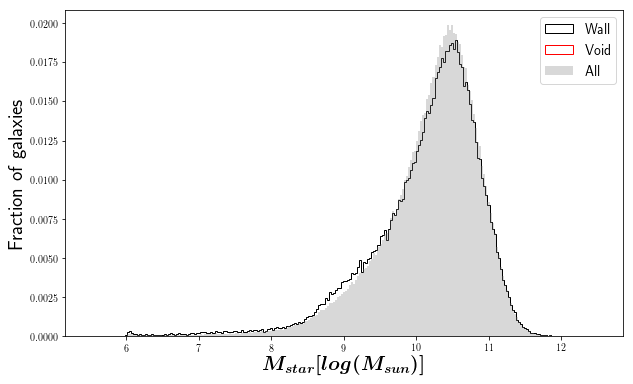

/software/python3/3.6.5/lib/python3.6/site-packages/ipykernel/__main__.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/software/python3/3.6.5/lib/python3.6/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in true_divide


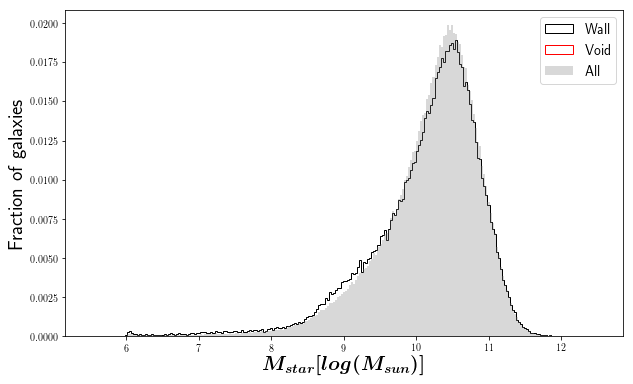

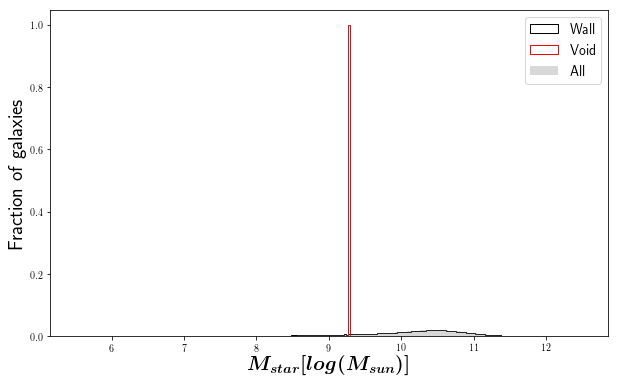

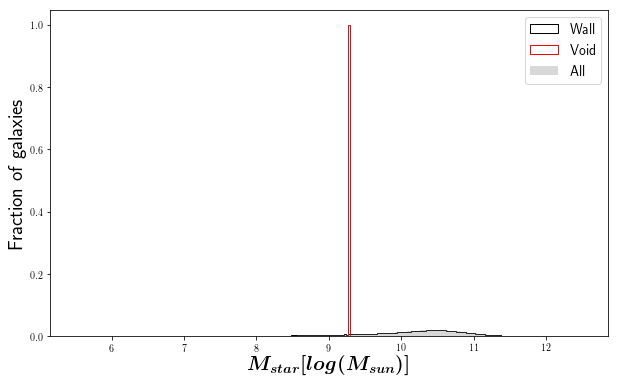

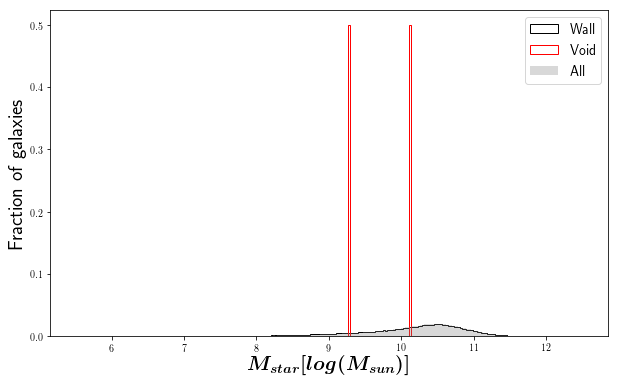

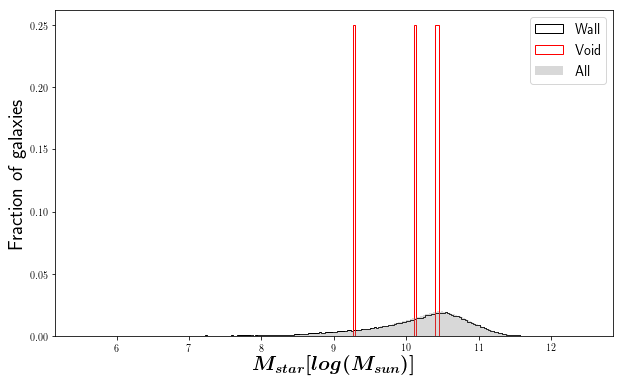

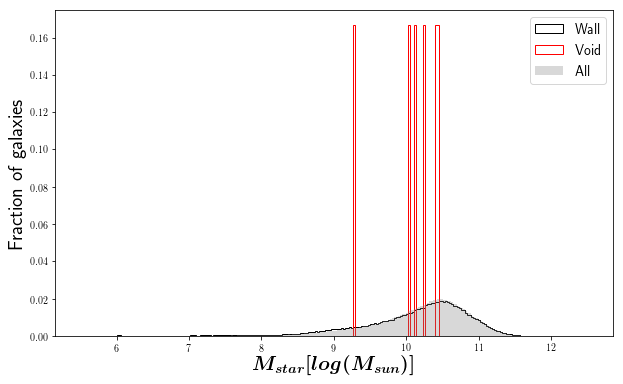

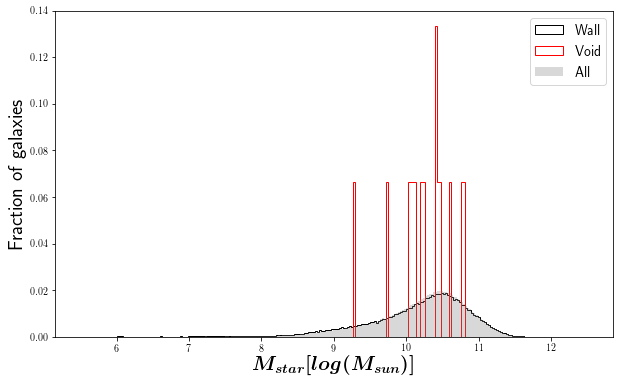

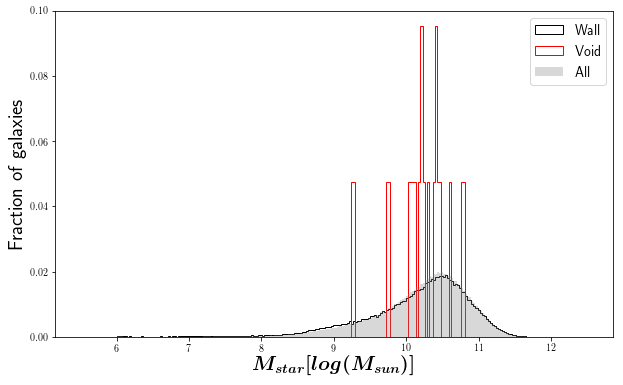

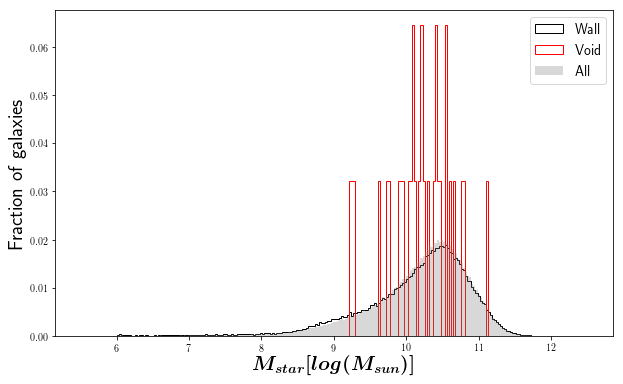

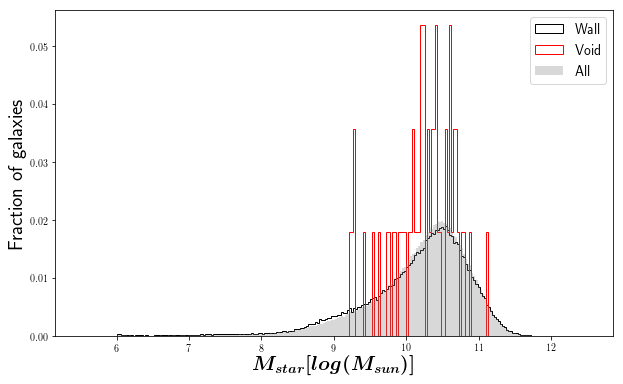

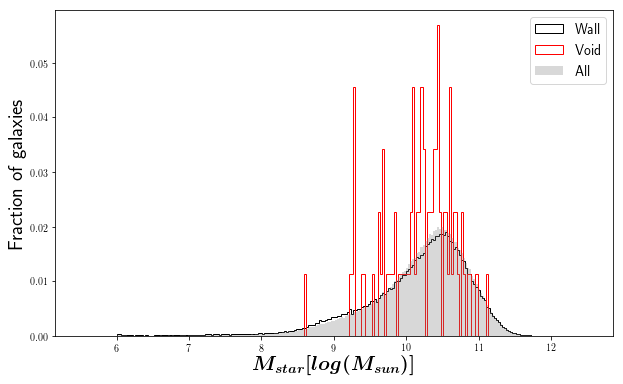

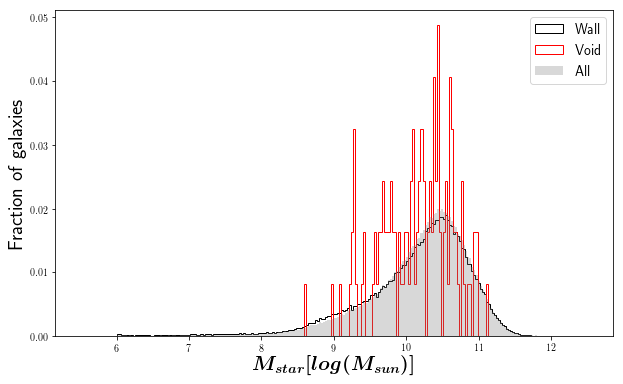

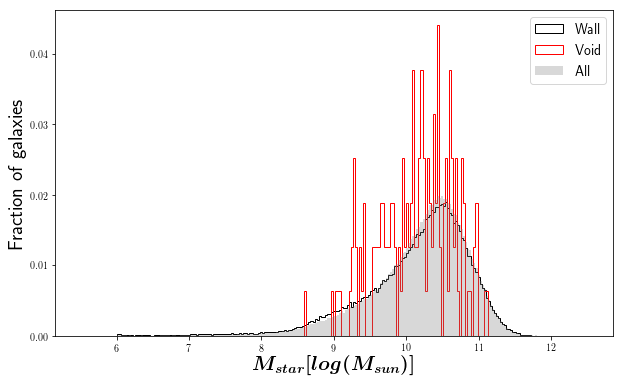

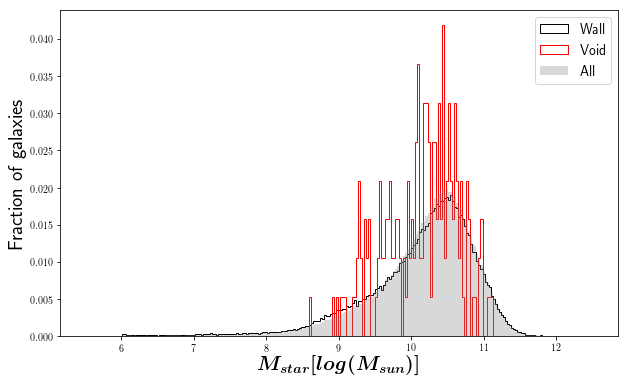

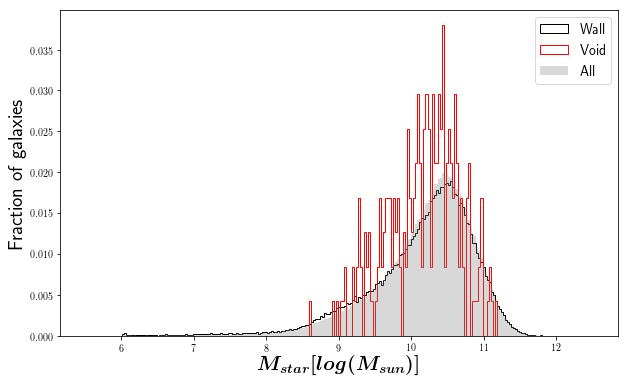

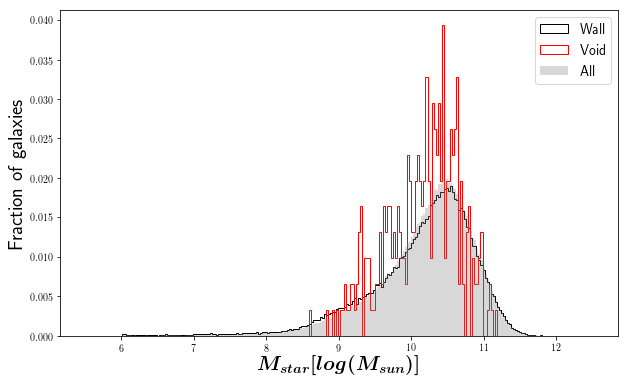

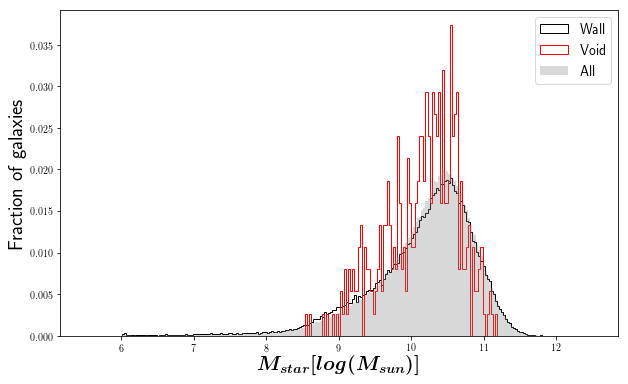

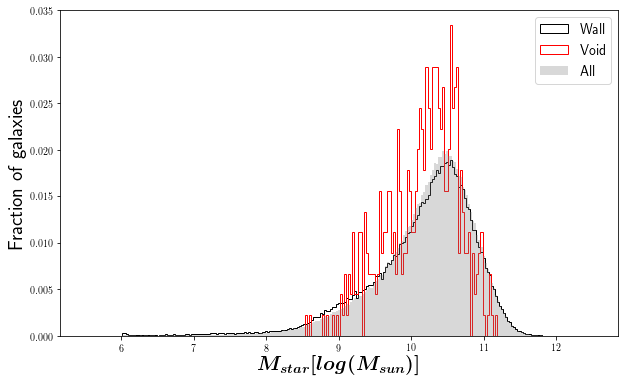

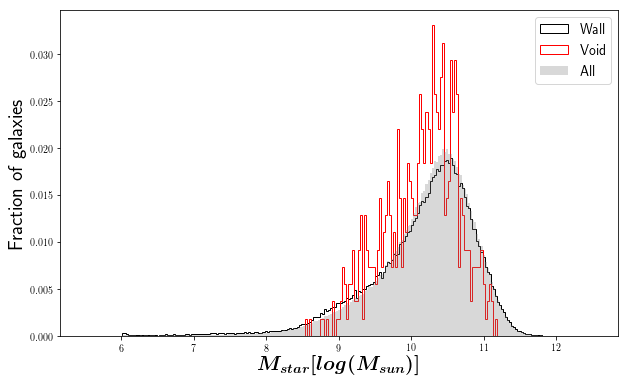

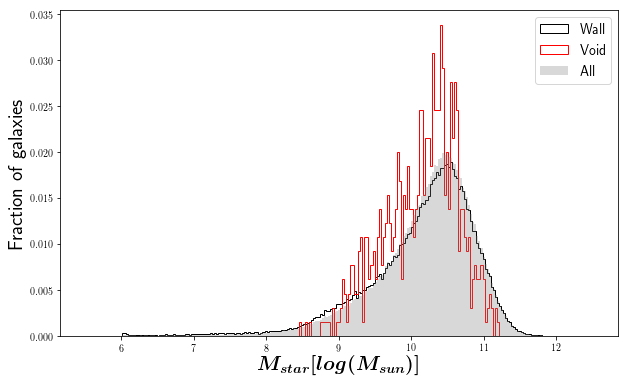

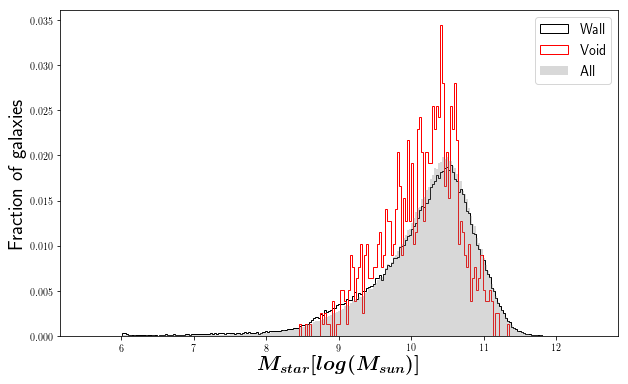

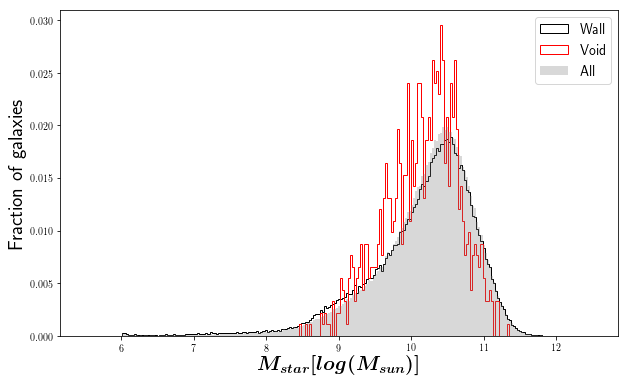

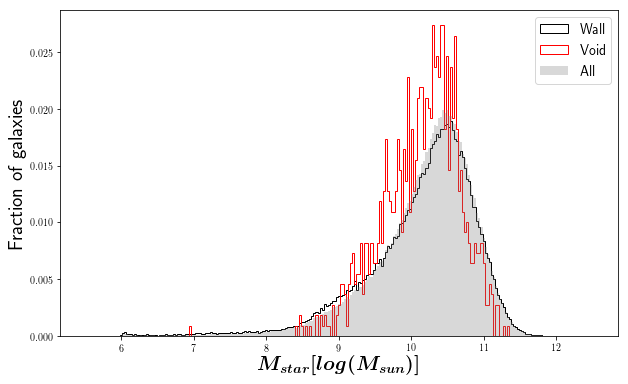

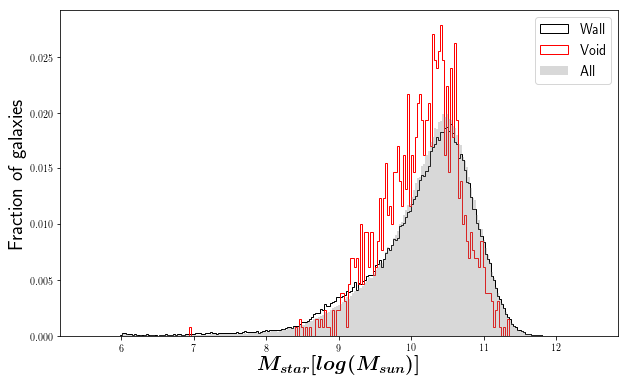

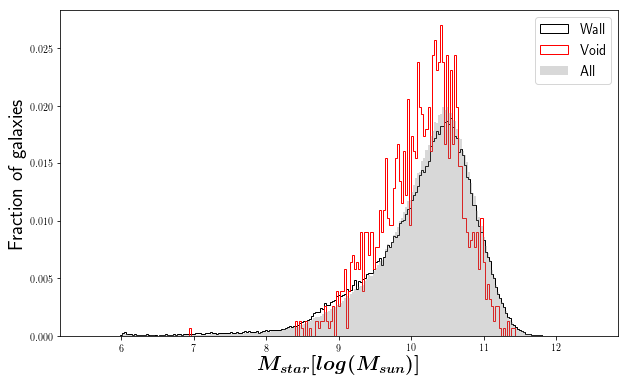

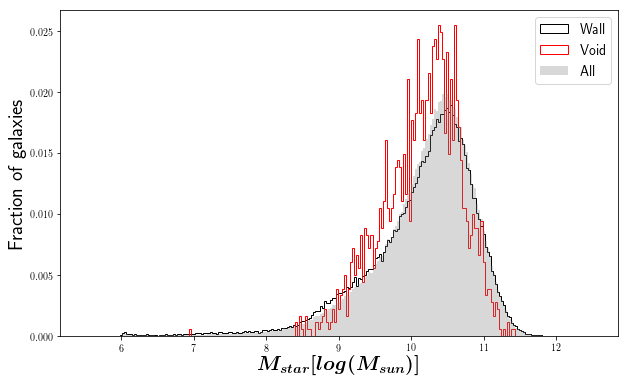

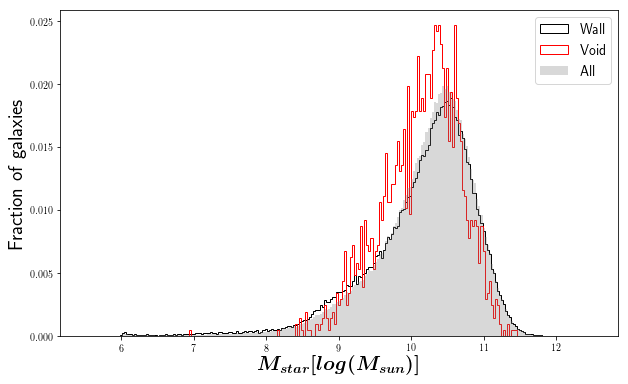

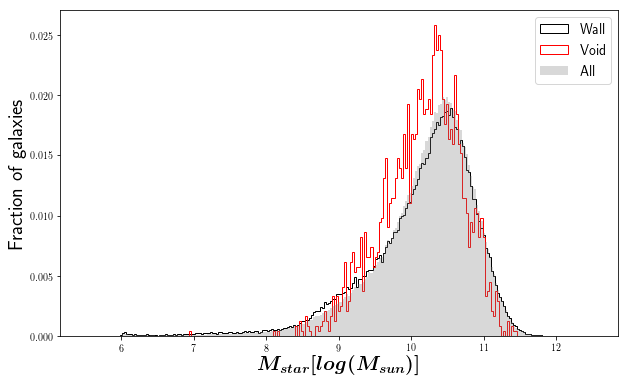

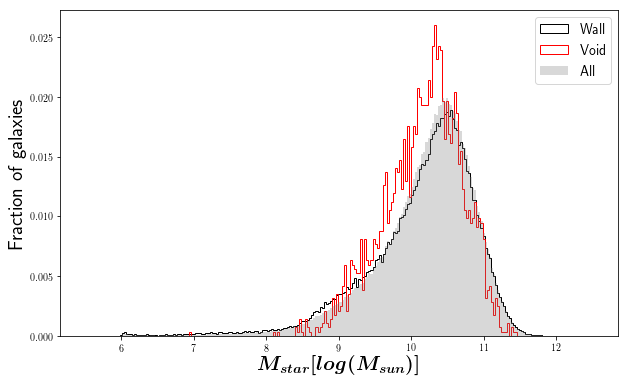

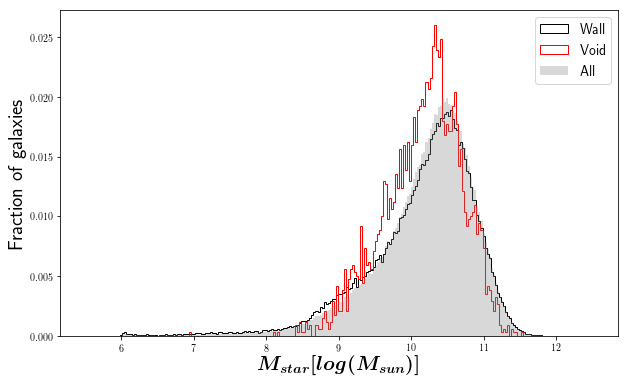

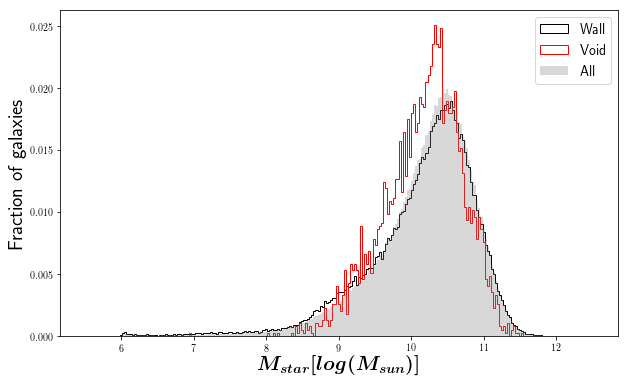

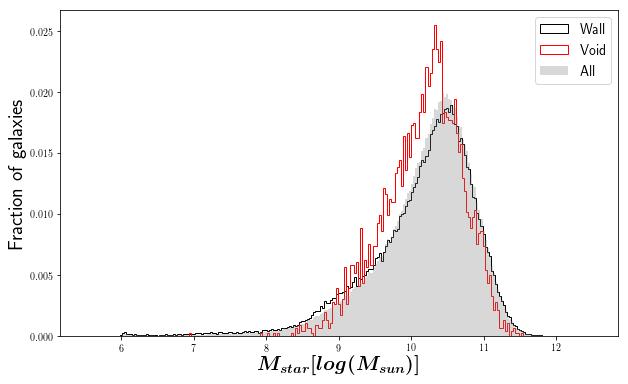

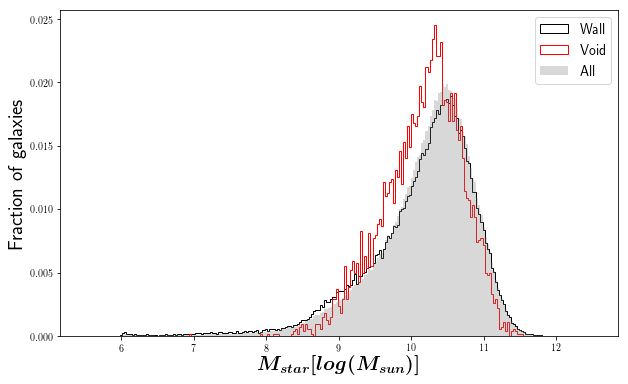

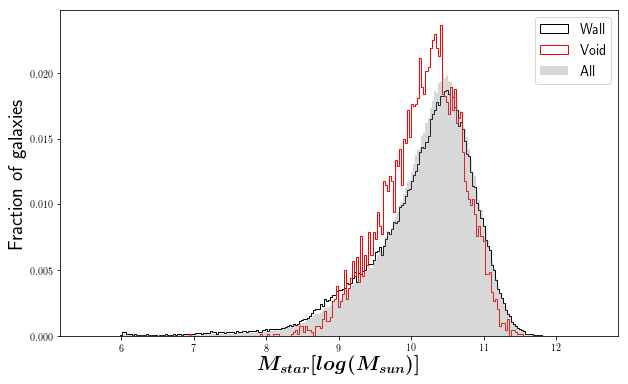

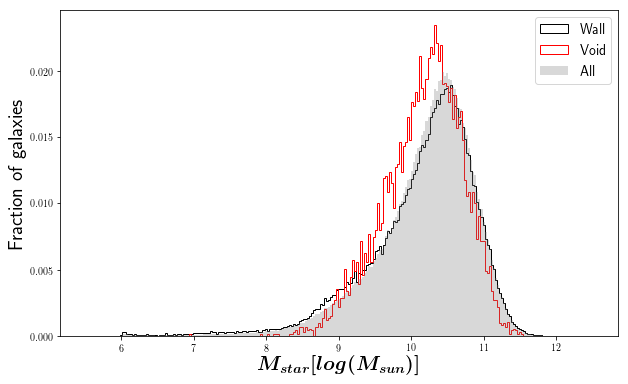

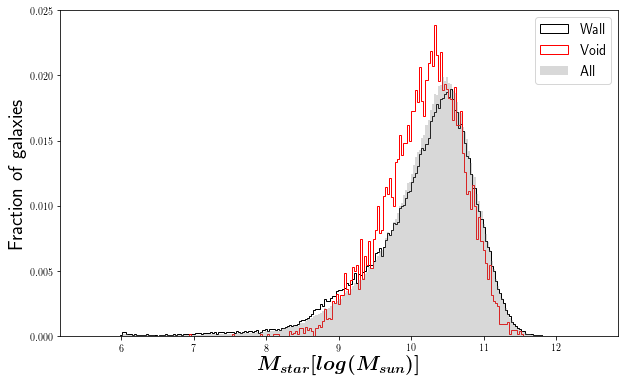

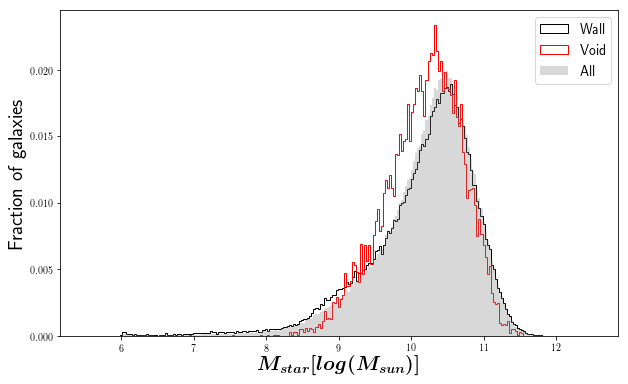

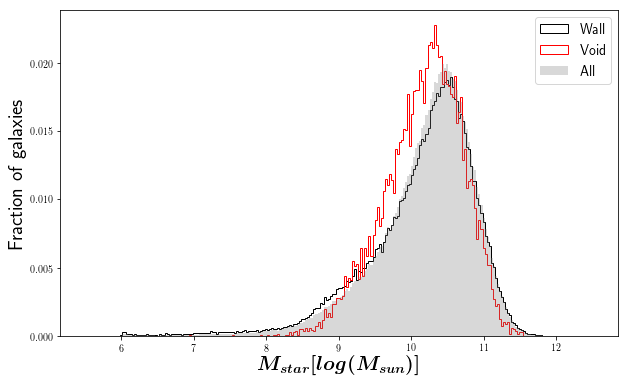

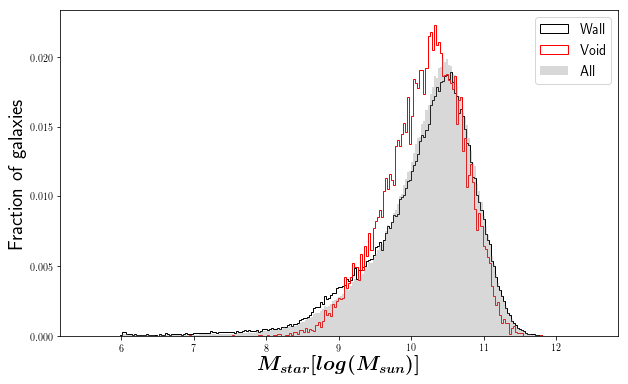

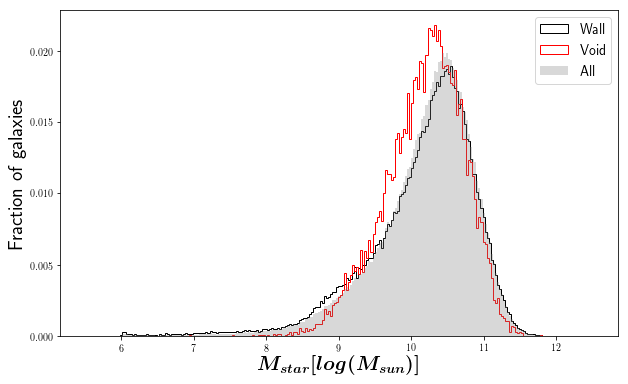

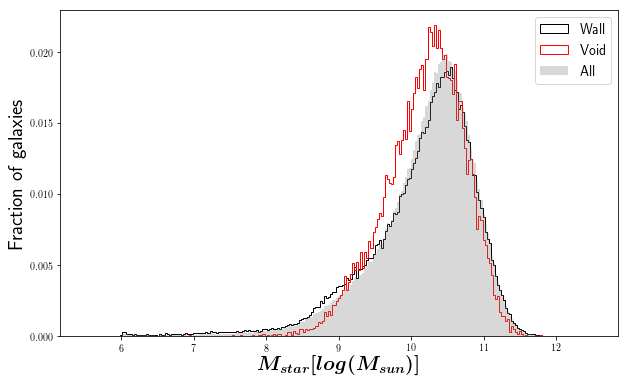

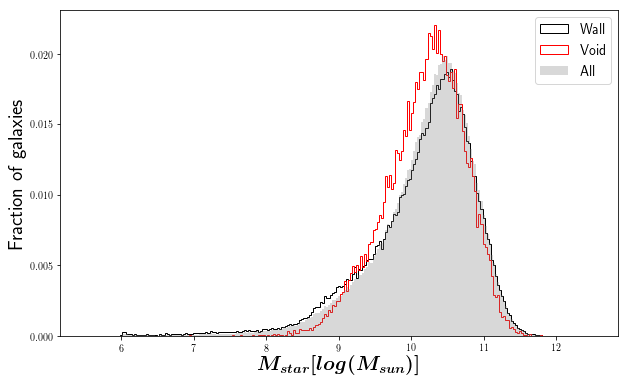

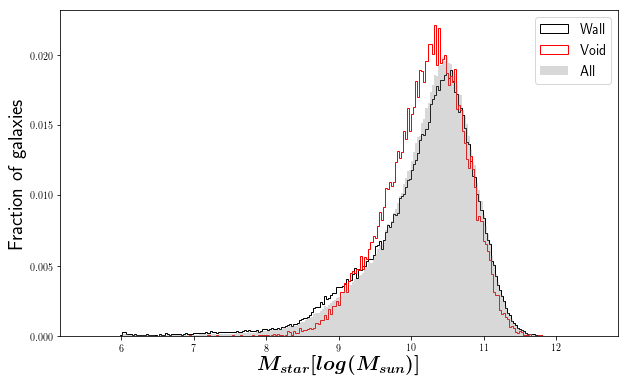

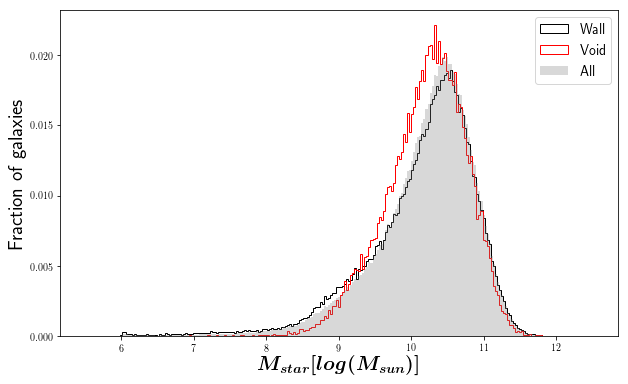

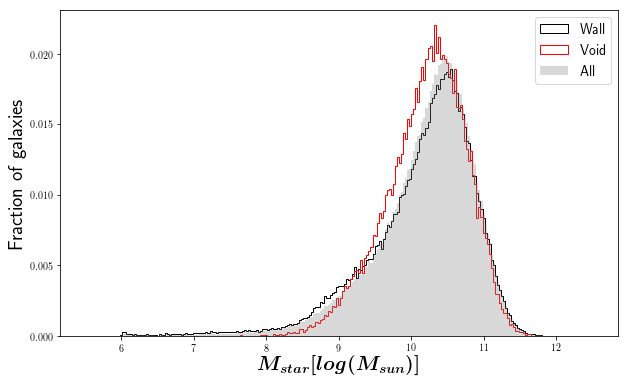

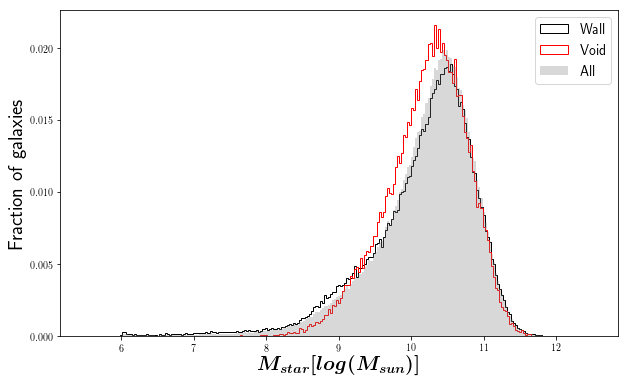

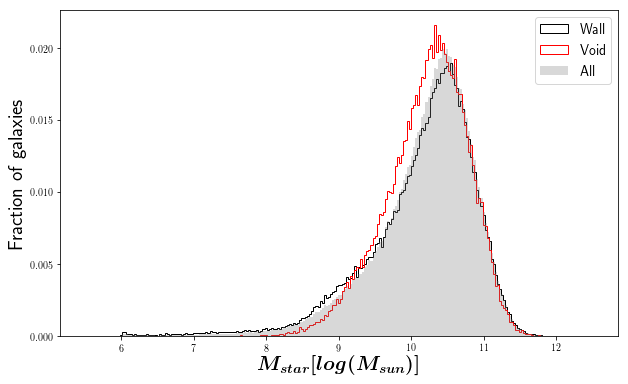

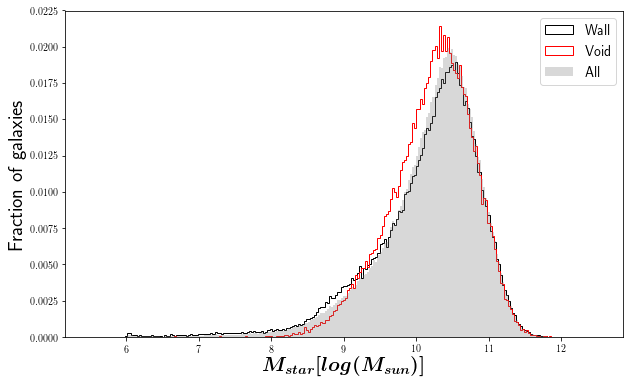

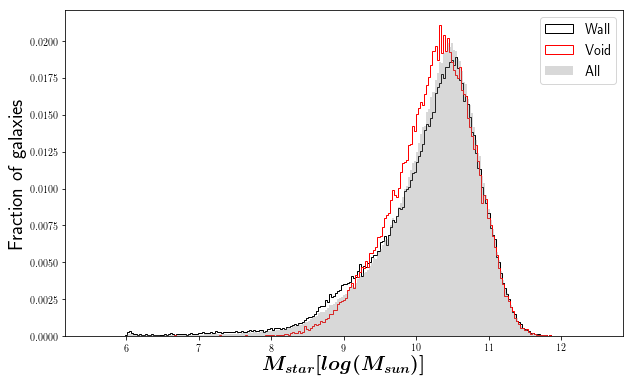

In [16]:
for i in range(len(ind_gal_depth_voidv2_new)):
#     char_inside(u_r,np.linspace(0,4, 250),i,'Color u_r - V^2',r'\boldmath$u-r$',x=0.2,y=0.016)
    char_inside(Mstar,np.linspace(5.5,12.5, 250),i,r'\textbf{Star Mass - }\boldmath${V^{2}}$',r'\boldmath$M_{star} [ log(M_{sun}) ]$',x=6,y=0.8*0.019)
#     char_inside(Mstar,np.linspace(5.5,12.5, 250),i,r'\textbf{Star Mass - Voidfinder}',r'\boldmath$M_{star} [ log(M_{sun}) ]$',x=6,y=0.0178)
#     char_inside(sSFR,np.linspace(-13,-8, 250),i,'specific star formation rate - V^2','sSFR [log(1/yr)] ',x=-12.7,y=0.0105)
# char_void(Mstar,np.linspace(5.5,12.5, 250),'Star Mass - void galaxies',r'\boldmath$Mstar [log(M_{sun})]$')
# CDF(Mstar,np.linspace(5.5,12.5, 700),'Cumulative Star Mass',r'\boldmath$Mstar [log(M_{sun})]$')

/software/python3/3.6.5/lib/python3.6/site-packages/ipykernel/__main__.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/software/python3/3.6.5/lib/python3.6/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in true_divide


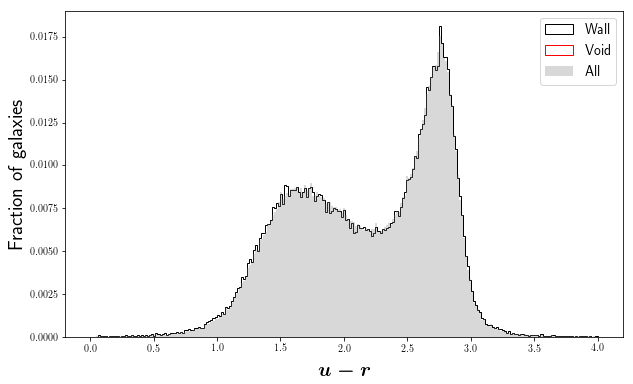

/software/python3/3.6.5/lib/python3.6/site-packages/ipykernel/__main__.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/software/python3/3.6.5/lib/python3.6/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in true_divide


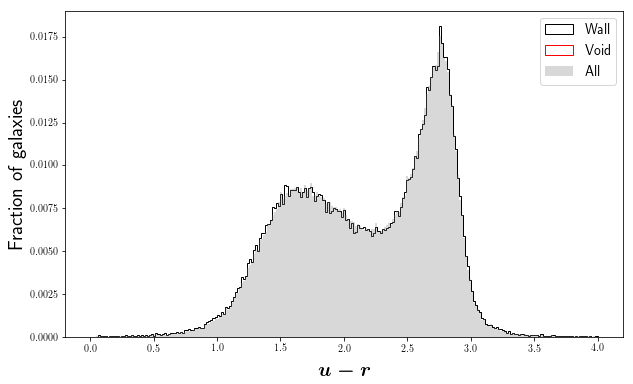

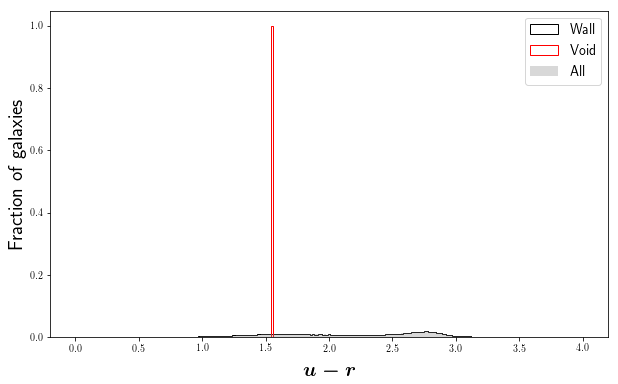

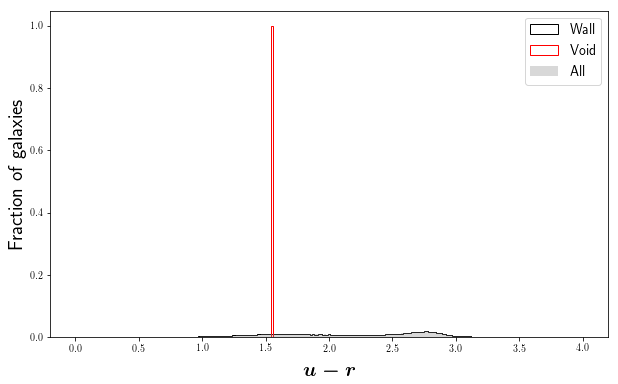

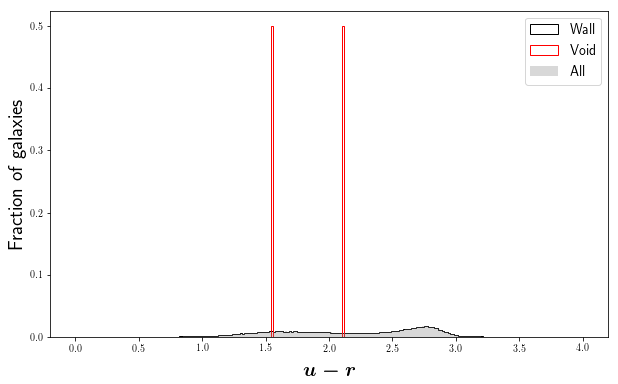

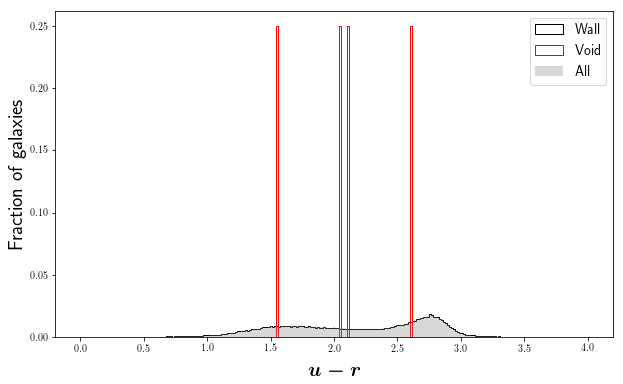

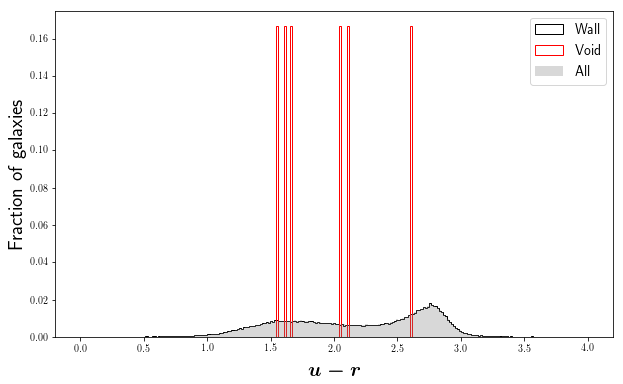

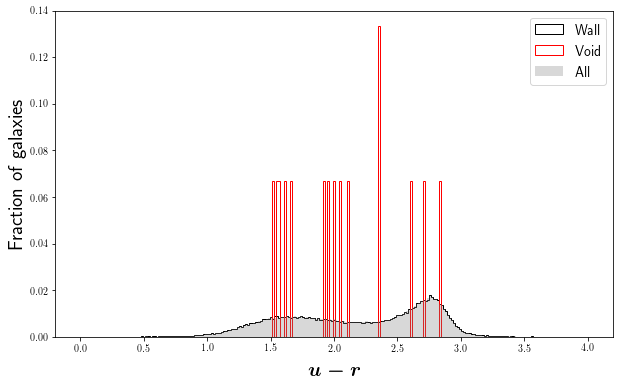

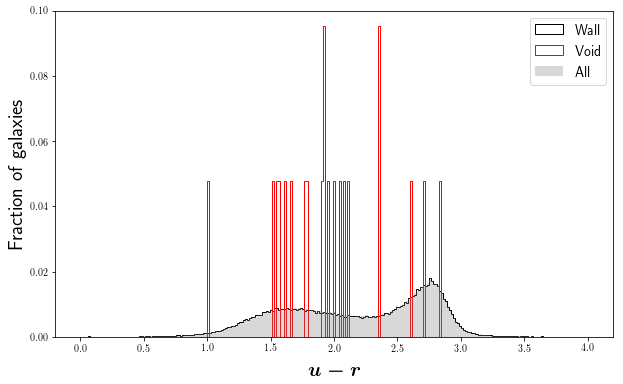

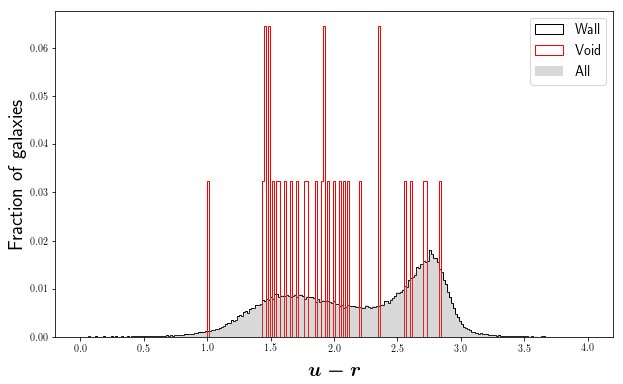

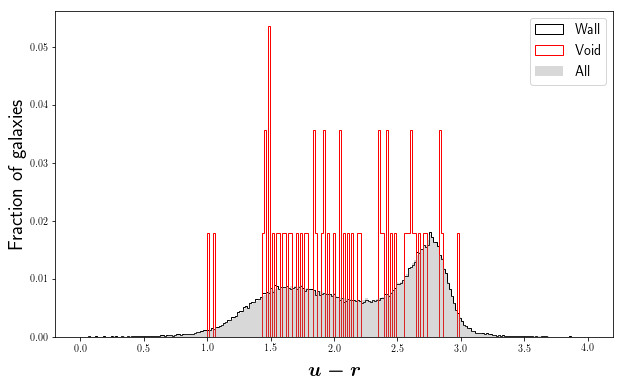

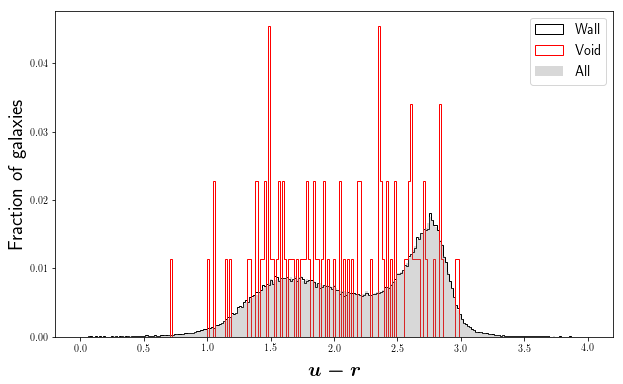

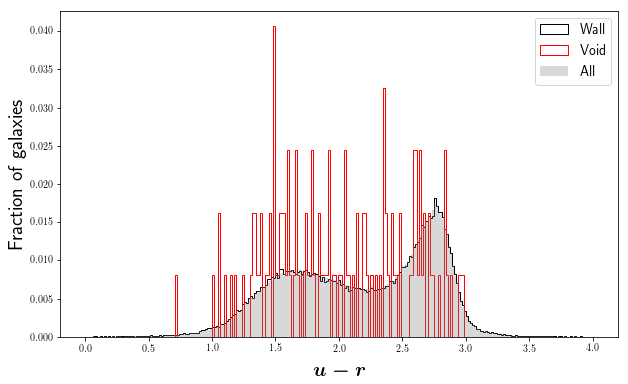

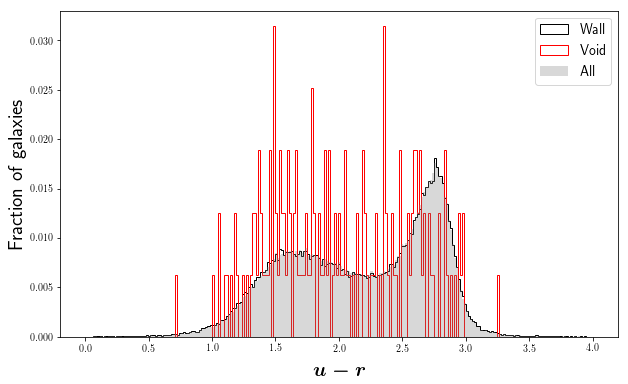

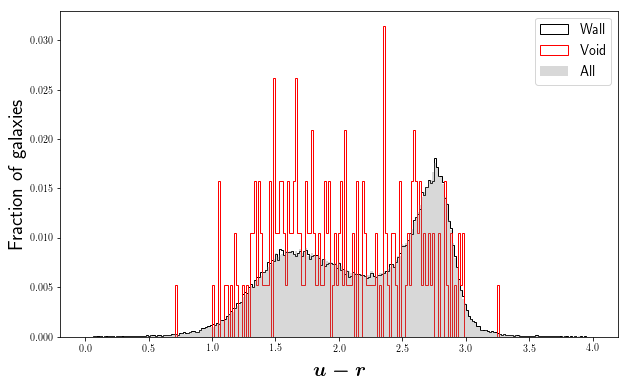

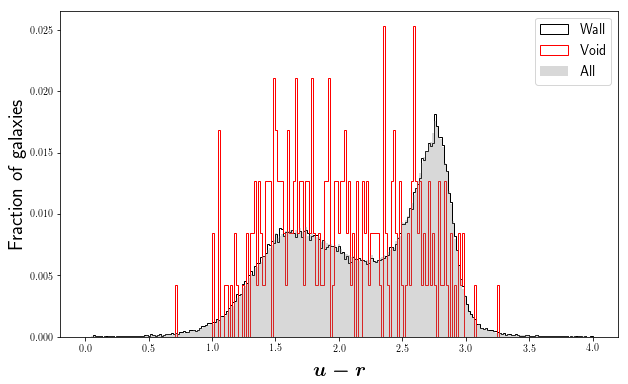

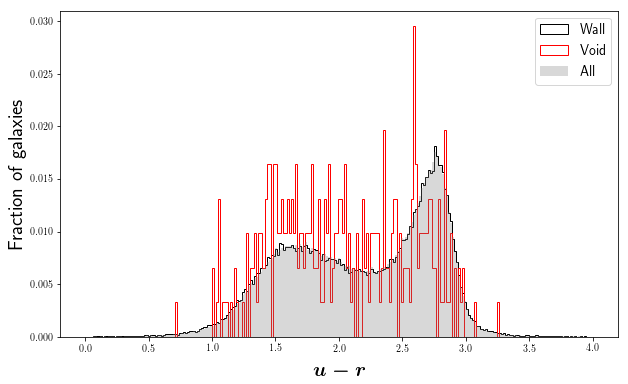

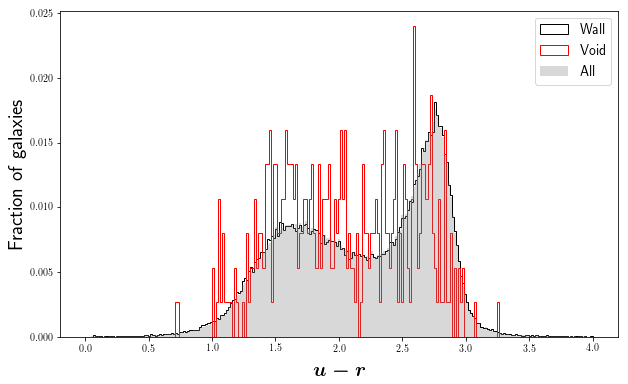

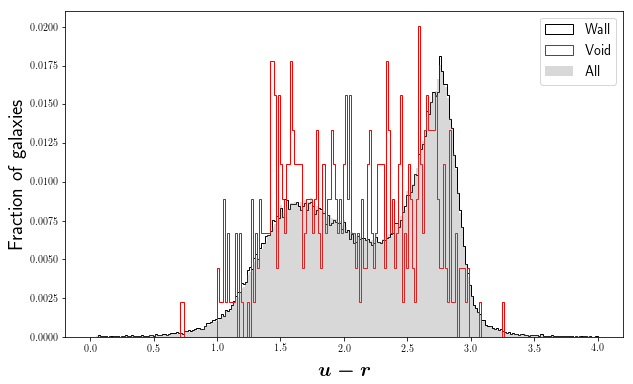

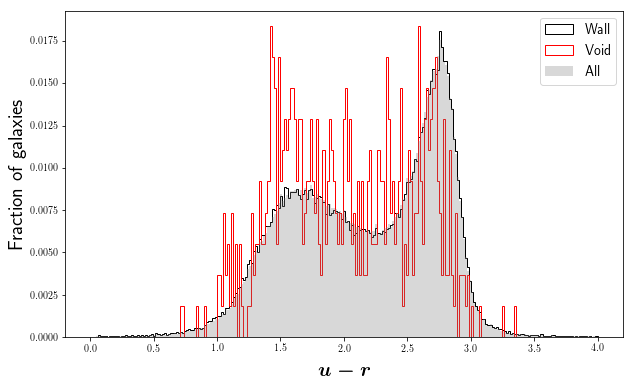

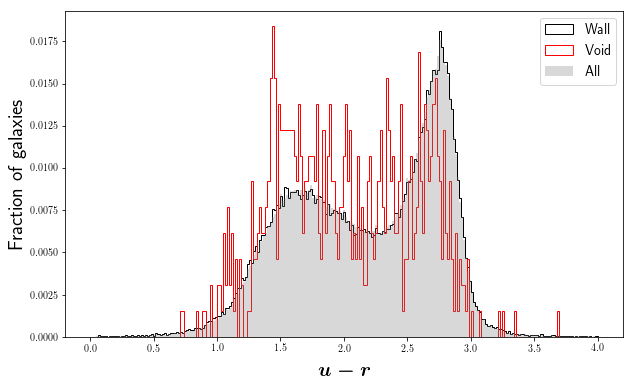

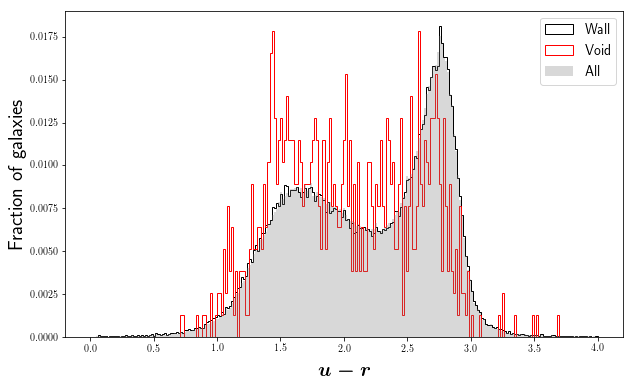

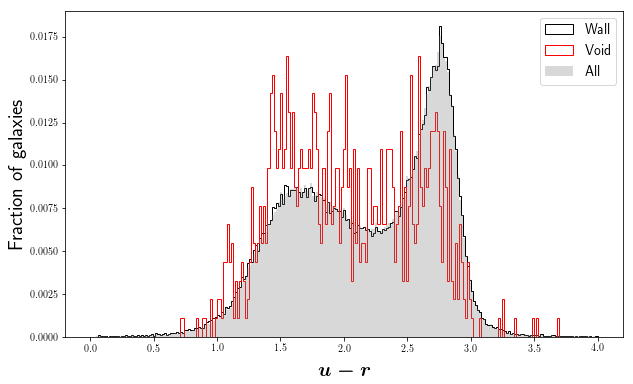

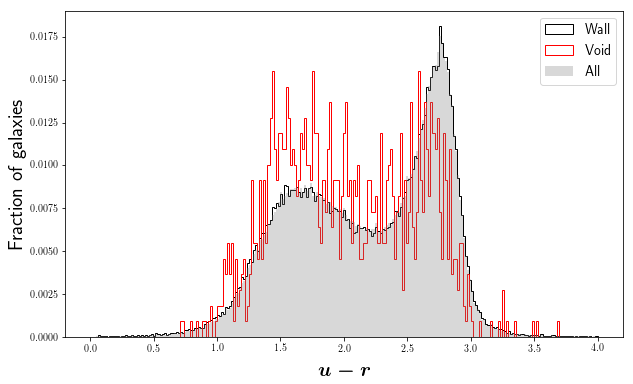

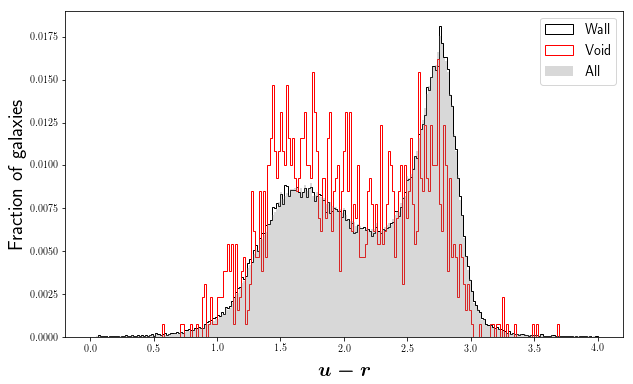

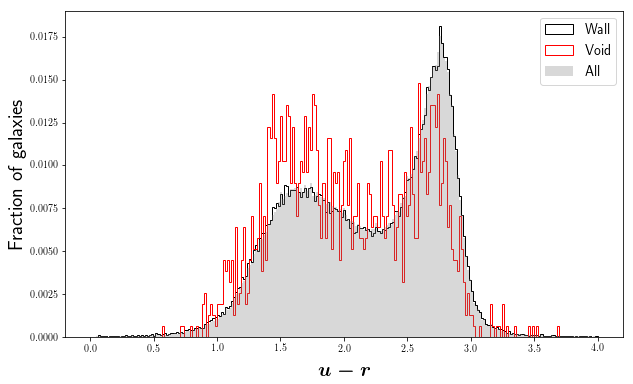

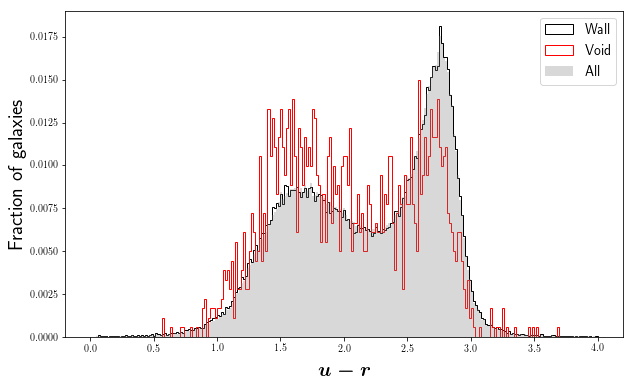

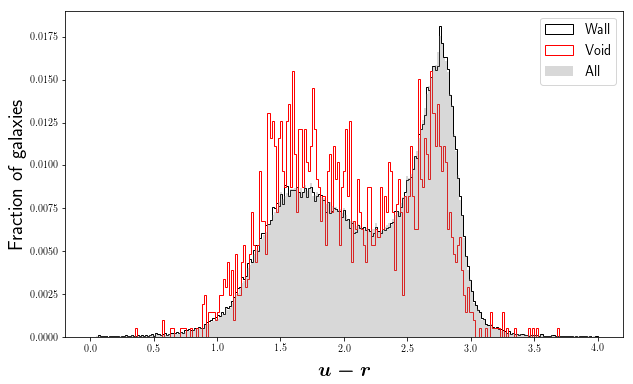

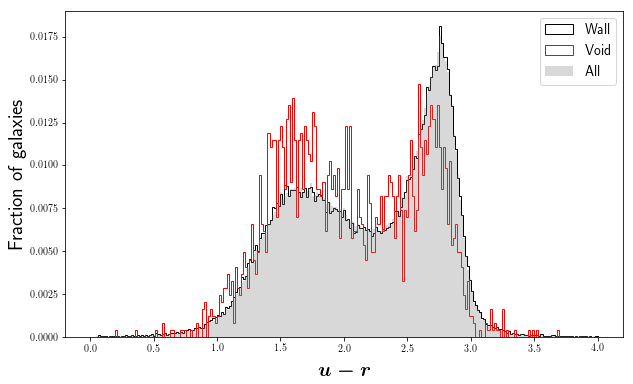

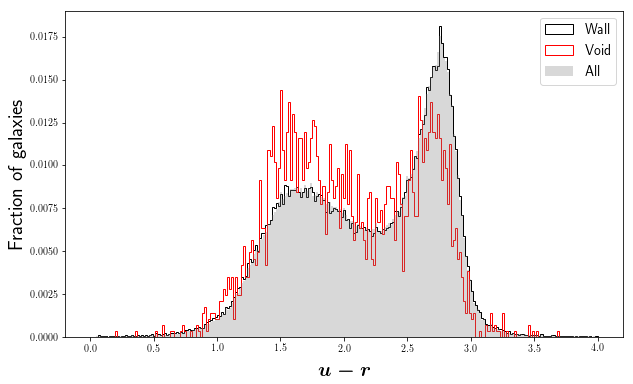

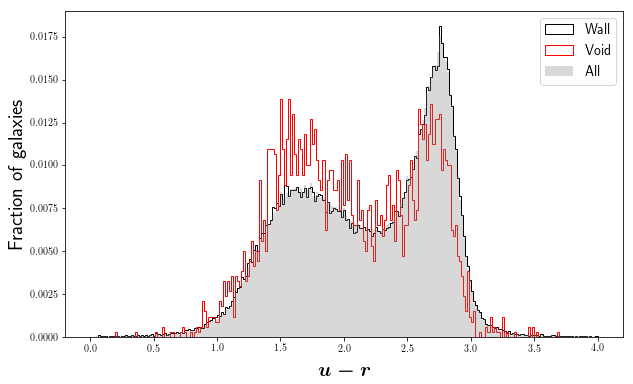

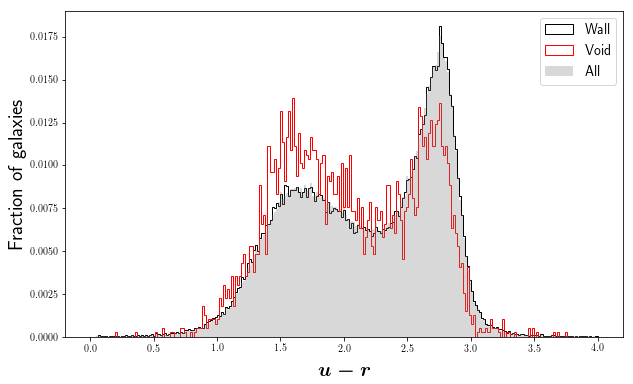

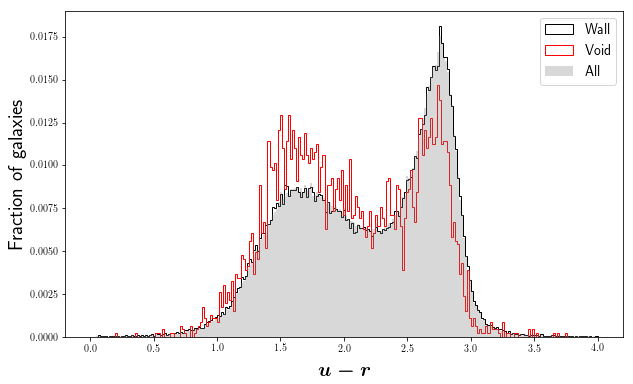

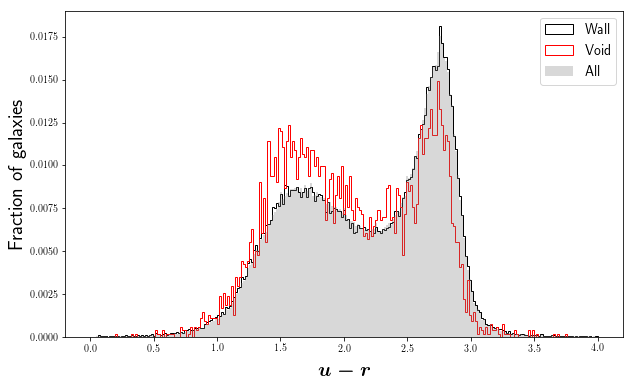

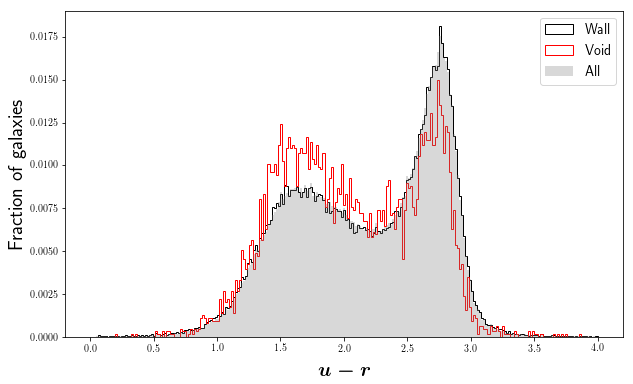

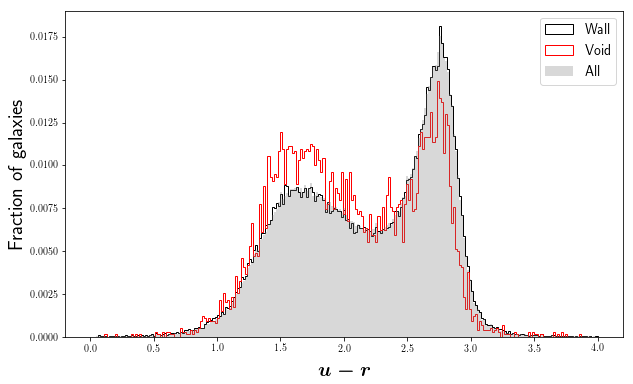

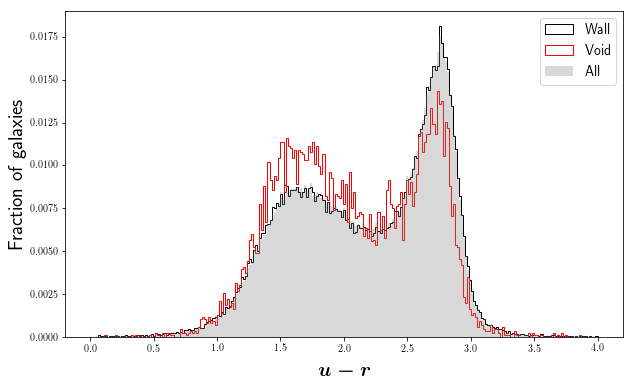

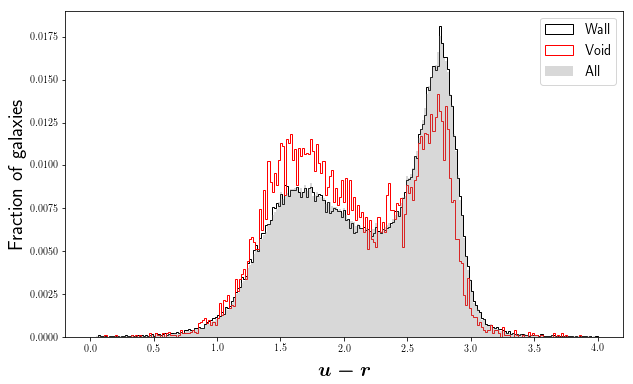

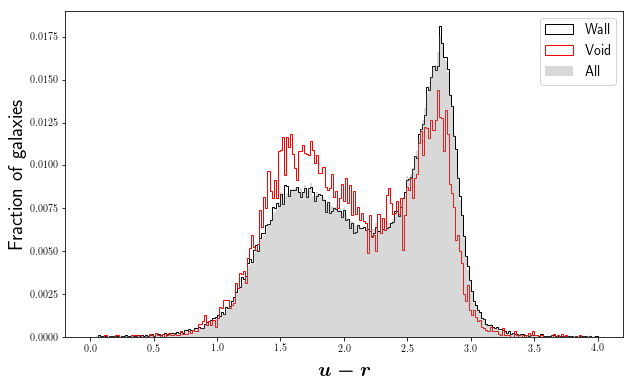

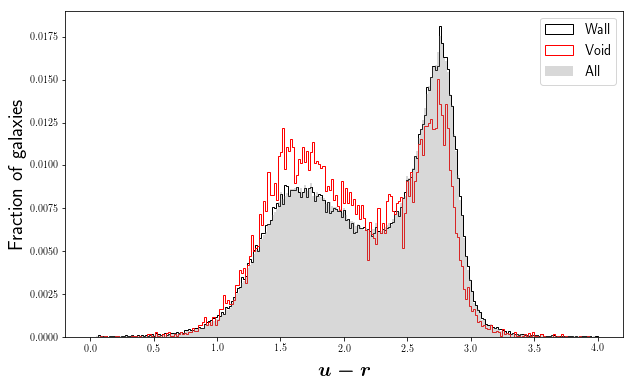

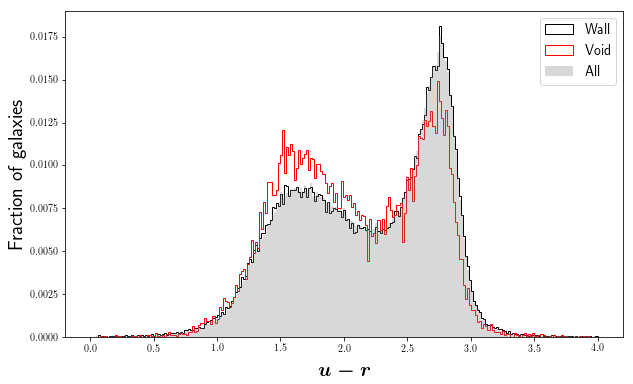

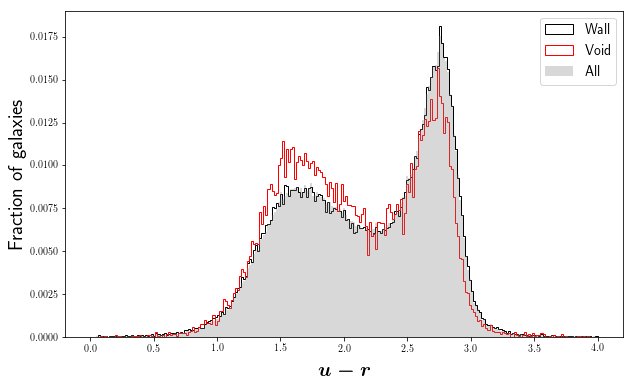

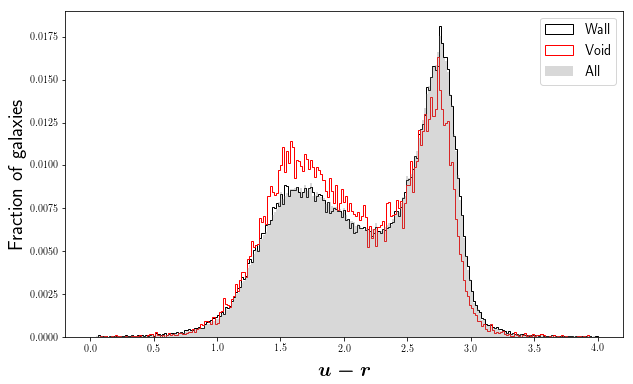

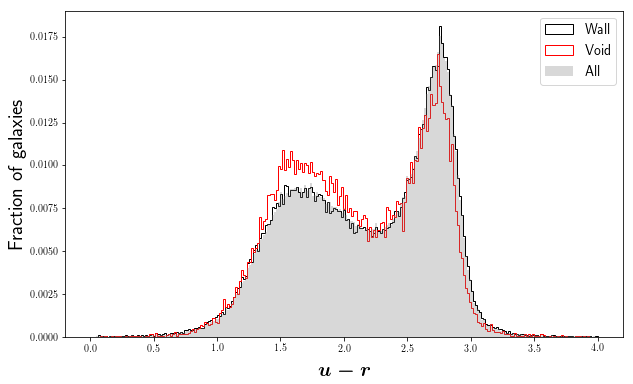

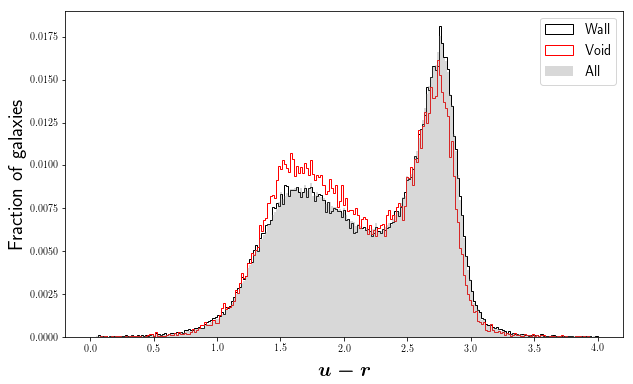

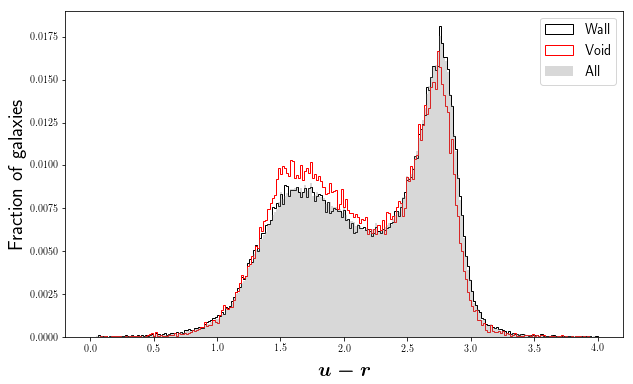

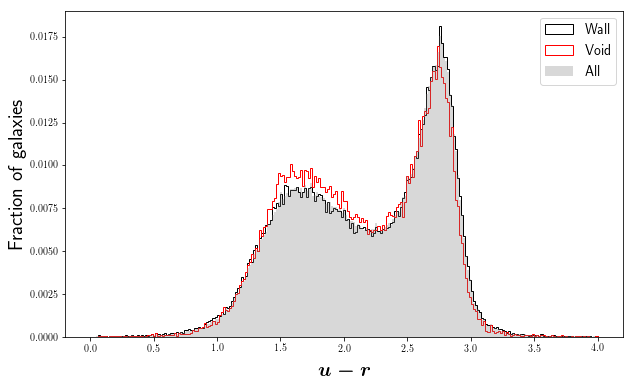

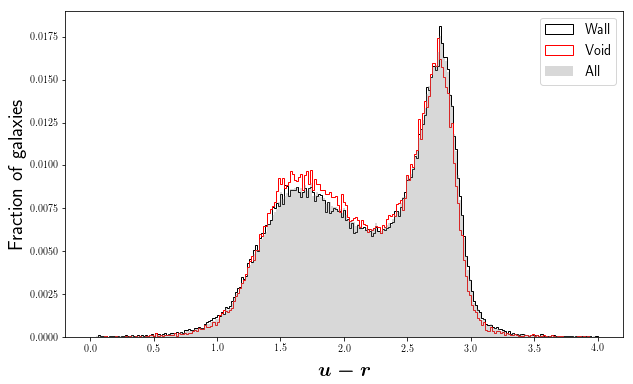

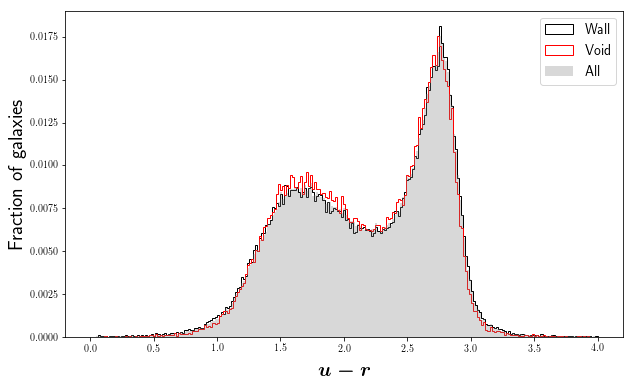

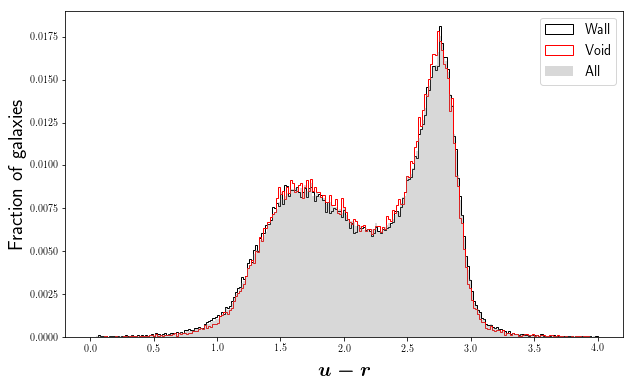

In [17]:
for i in range(len(ind_gal_depth_voidv2_new)):
    char_inside(u_r,np.linspace(0,4, 250),i,'Color u_r - V^2',r'\boldmath$u-r$',x=0.2,y=0.016)
#     char_inside(Mstar,np.linspace(5.5,12.5, 250),i,r'\textbf{Star Mass - }\boldmath${V^{2}}$',r'\boldmath$M_{star} [ log(M_{sun}) ]$',x=6,y=0.8*0.019)
#     char_inside(Mstar,np.linspace(5.5,12.5, 250),i,r'\textbf{Star Mass - Voidfinder}',r'\boldmath$M_{star} [ log(M_{sun}) ]$',x=6,y=0.0178)
#     char_inside(sSFR,np.linspace(-13,-8, 250),i,'specific star formation rate - V^2','sSFR [log(1/yr)] ',x=-12.7,y=0.0105)
# char_void(Mstar,np.linspace(5.5,12.5, 250),'Star Mass - void galaxies',r'\boldmath$Mstar [log(M_{sun})]$')
# CDF(Mstar,np.linspace(5.5,12.5, 700),'Cumulative Star Mass',r'\boldmath$Mstar [log(M_{sun})]$')

/software/python3/3.6.5/lib/python3.6/site-packages/ipykernel/__main__.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/software/python3/3.6.5/lib/python3.6/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in true_divide


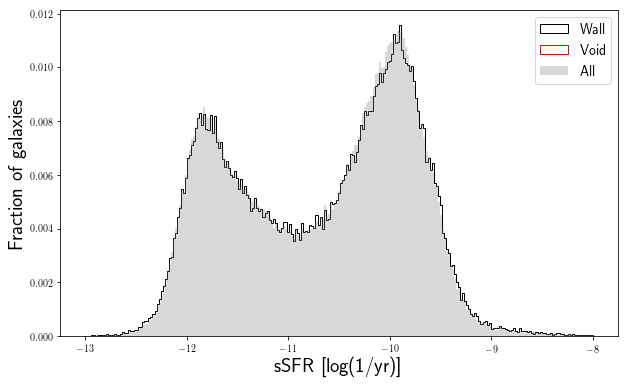

/software/python3/3.6.5/lib/python3.6/site-packages/ipykernel/__main__.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/software/python3/3.6.5/lib/python3.6/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in true_divide


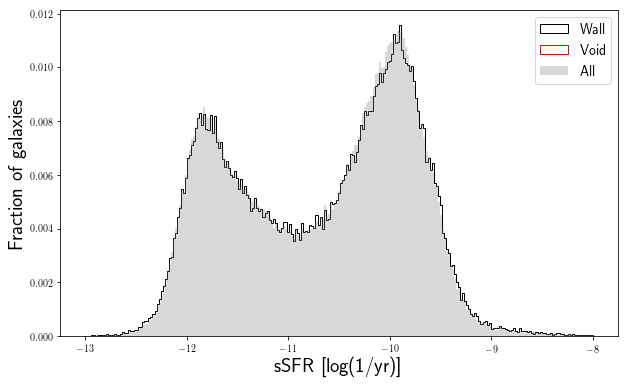

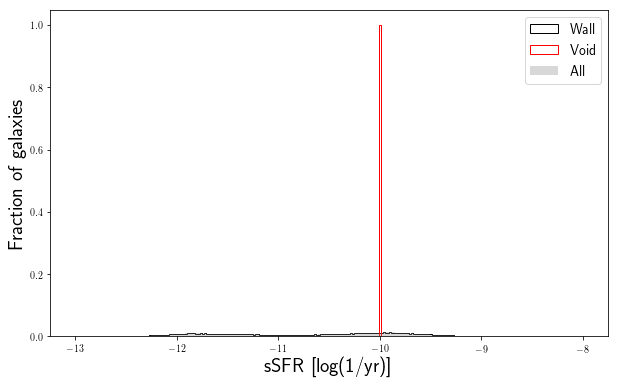

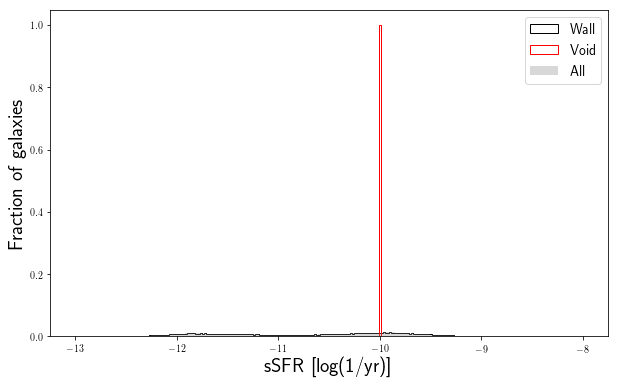

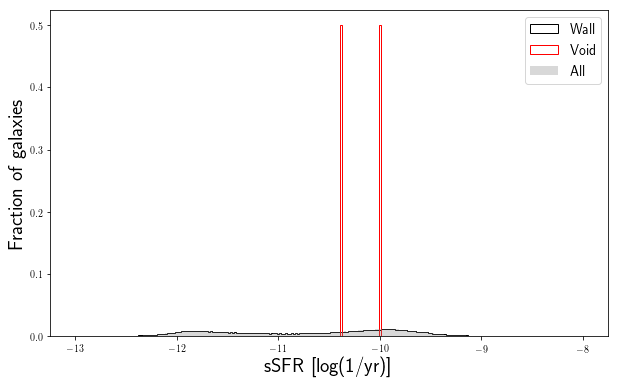

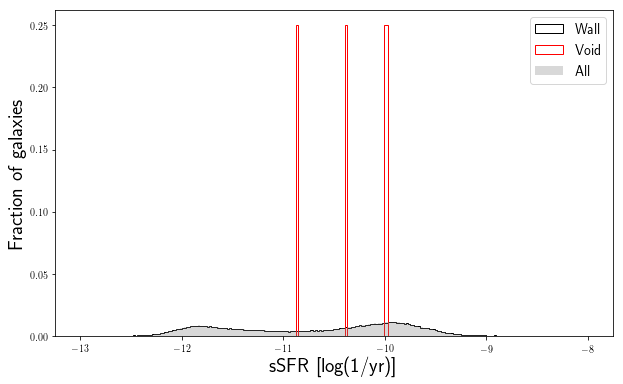

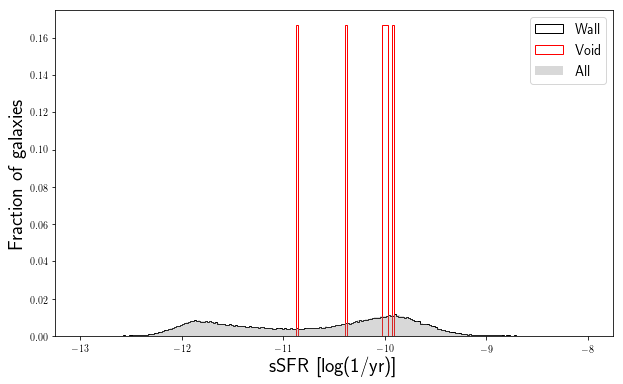

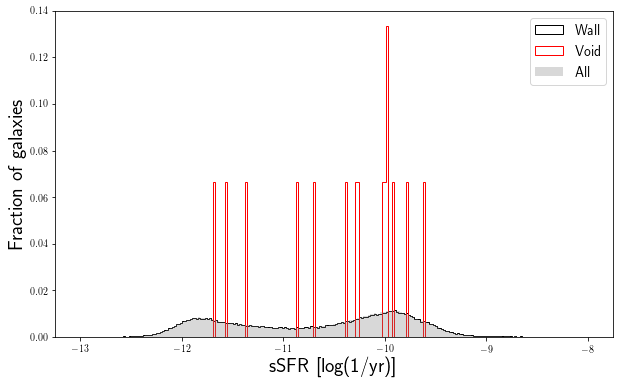

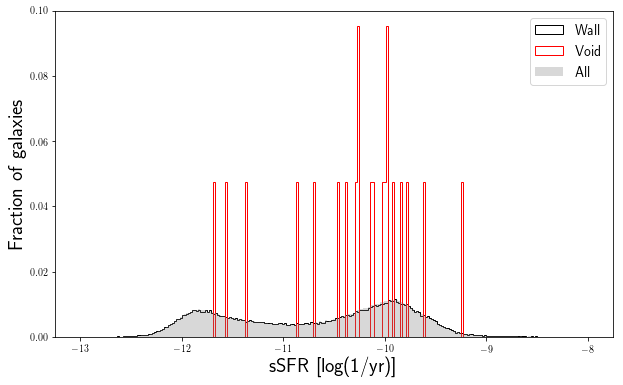

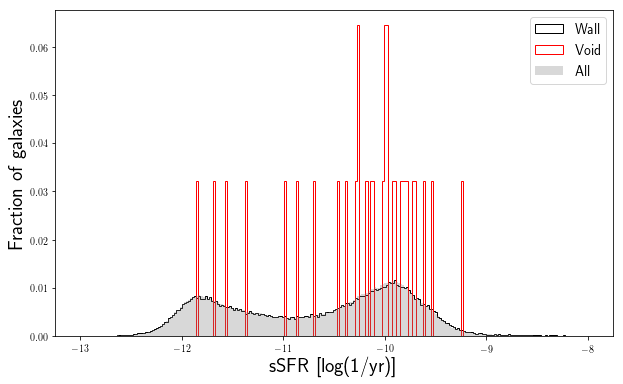

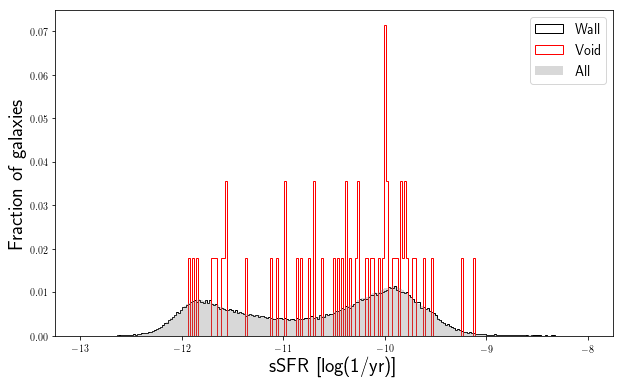

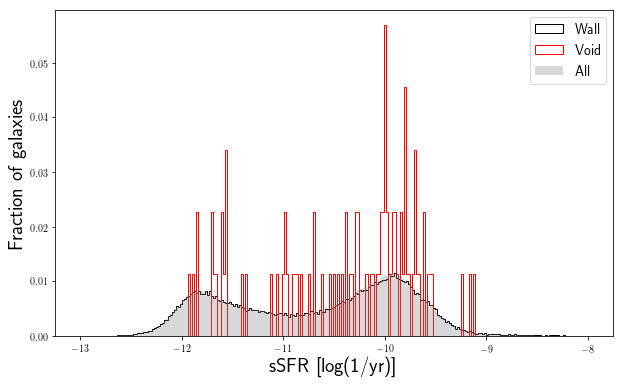

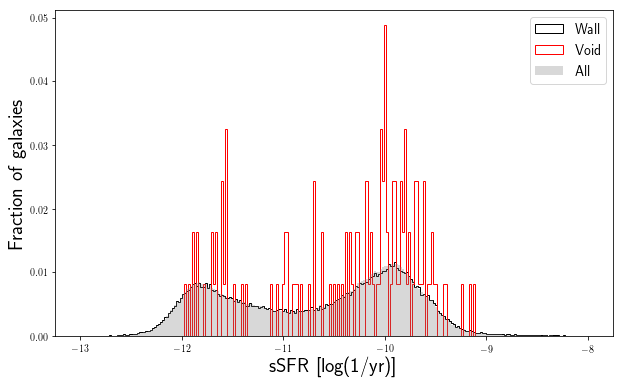

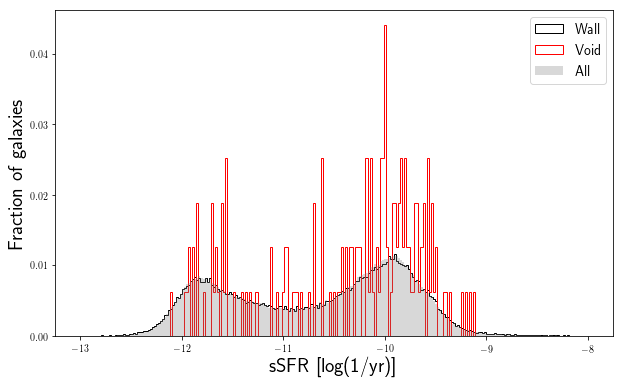

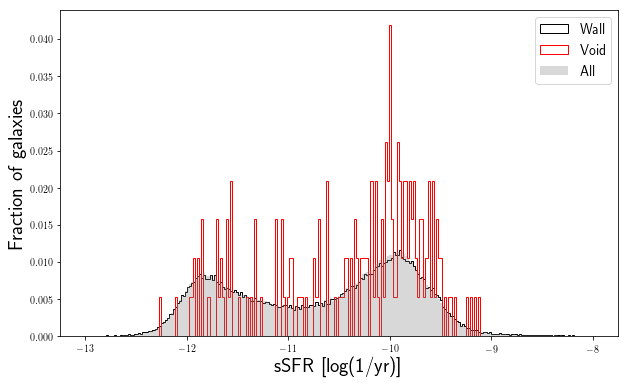

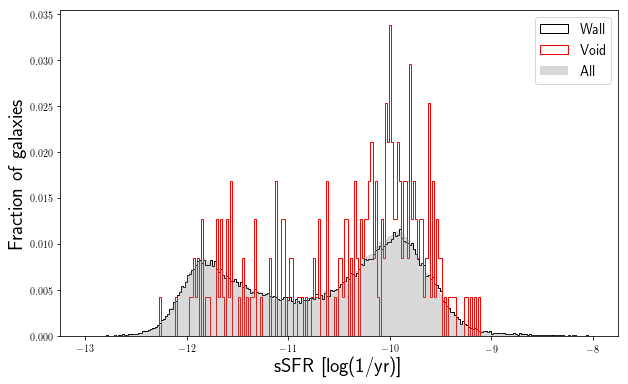

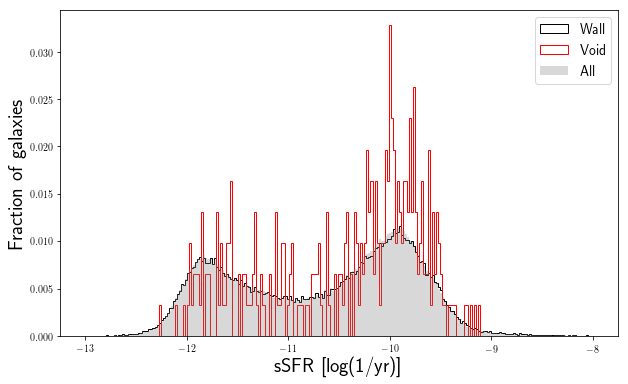

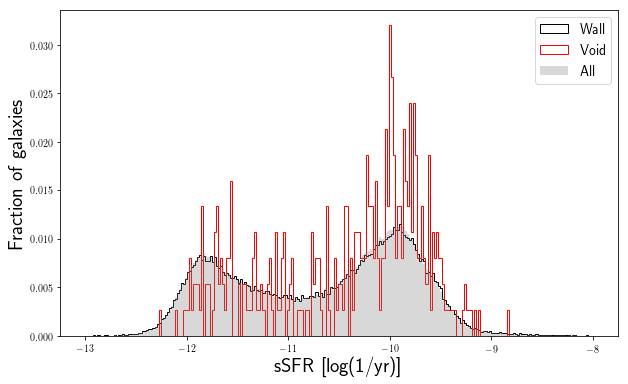

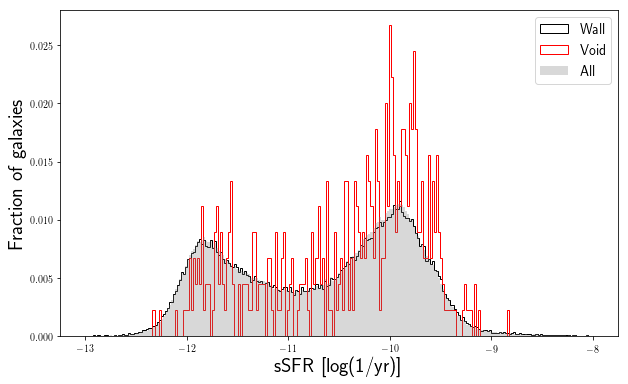

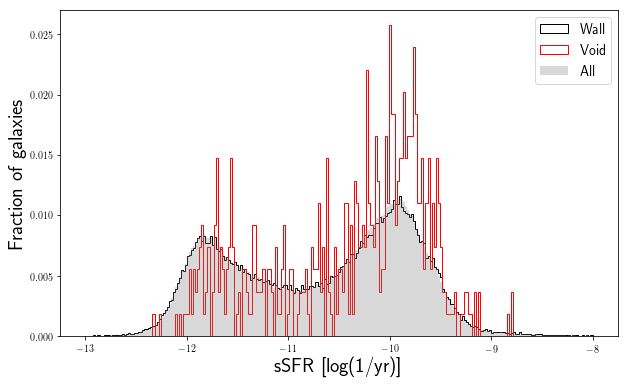

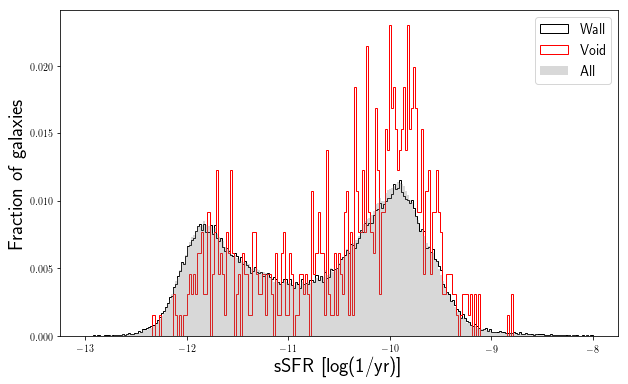

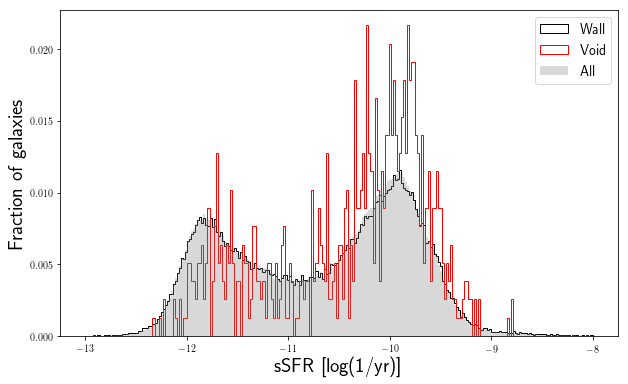

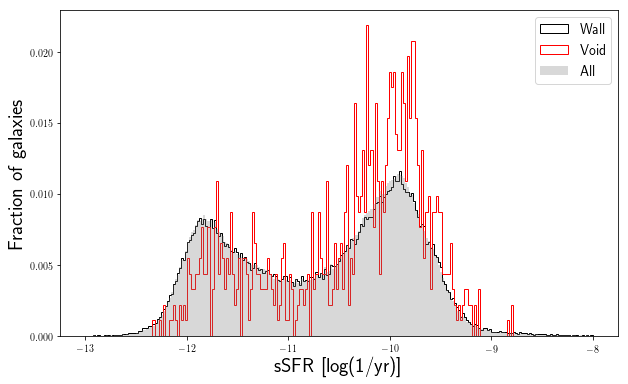

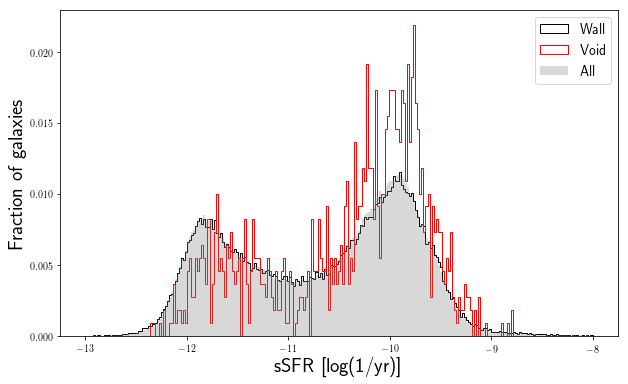

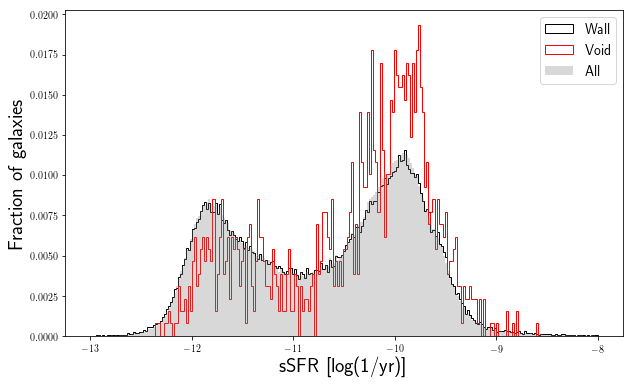

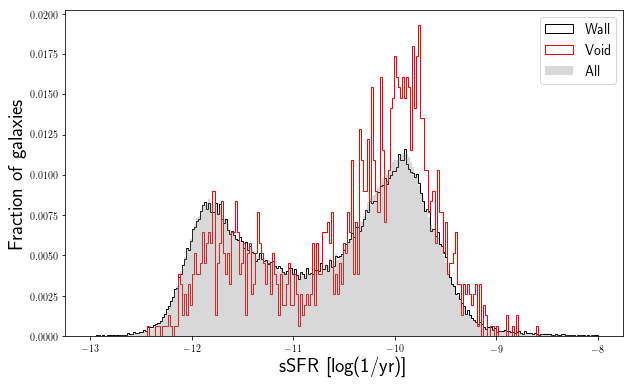

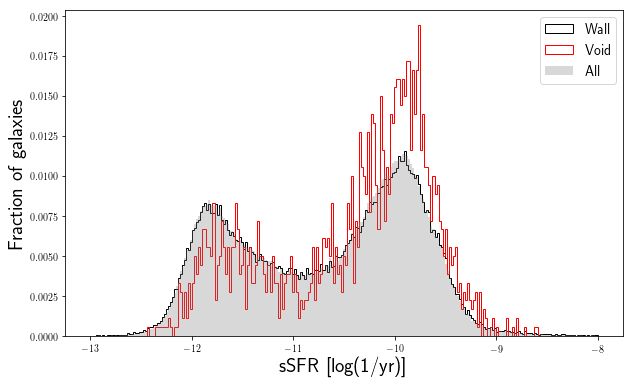

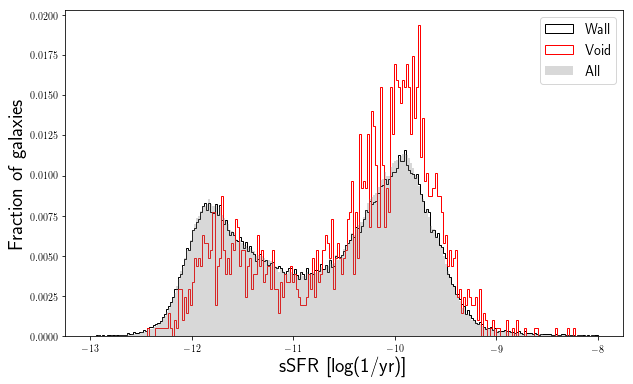

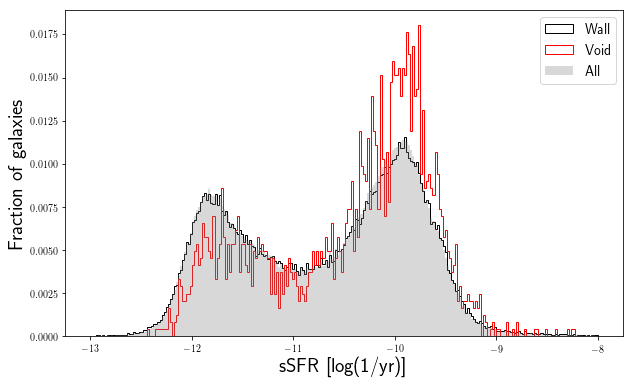

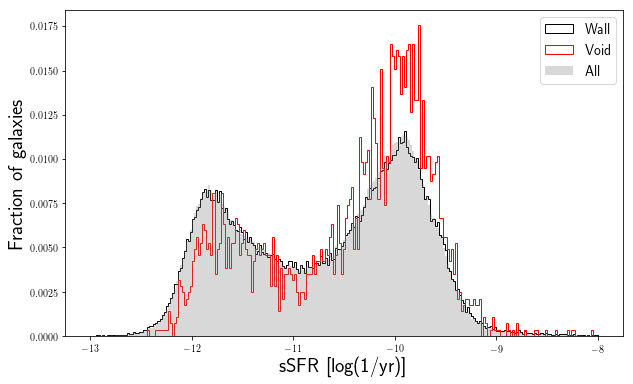

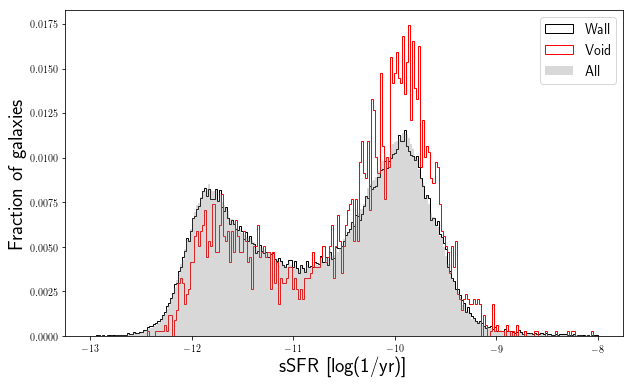

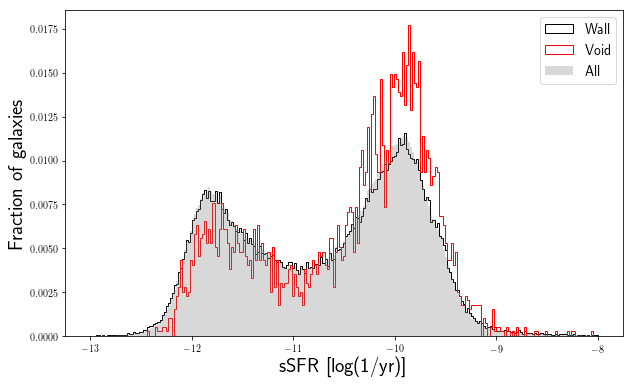

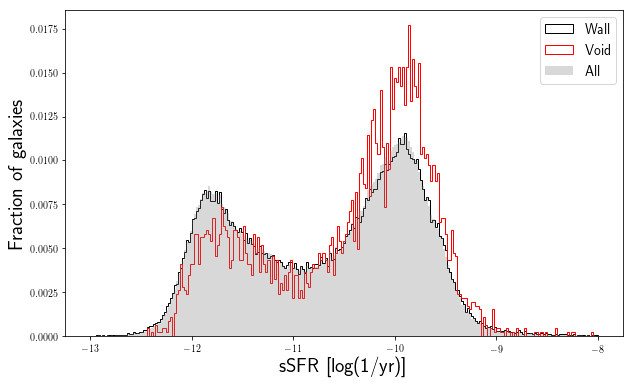

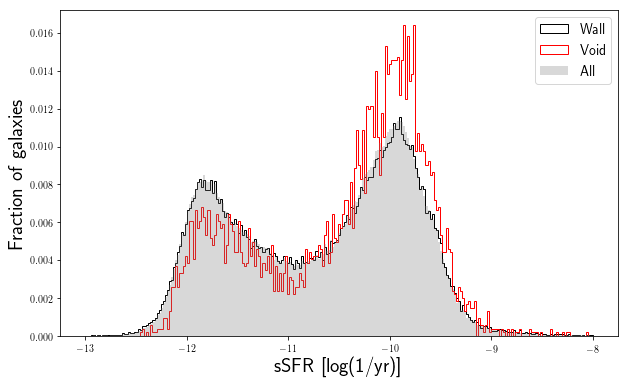

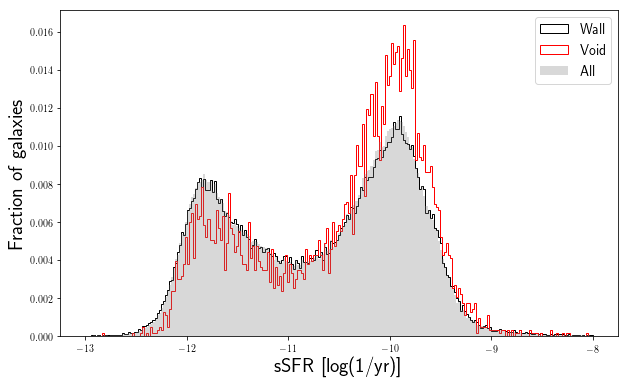

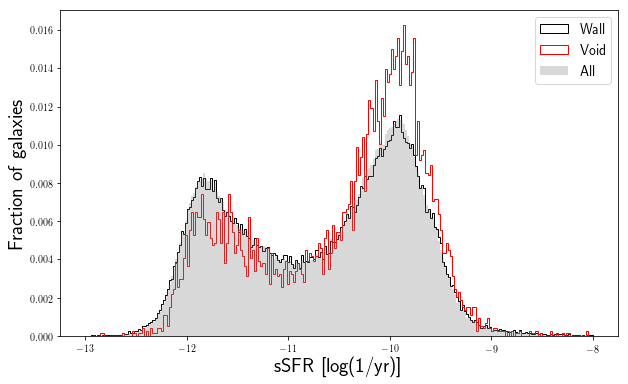

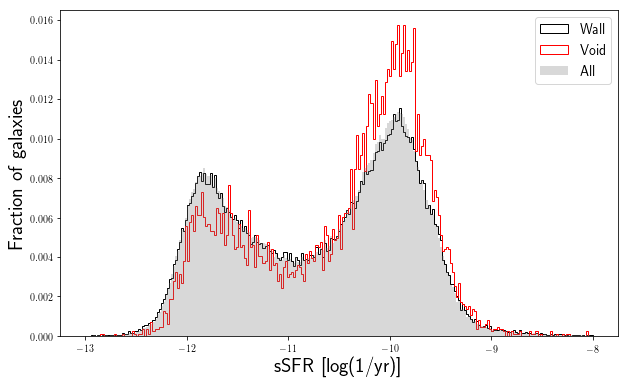

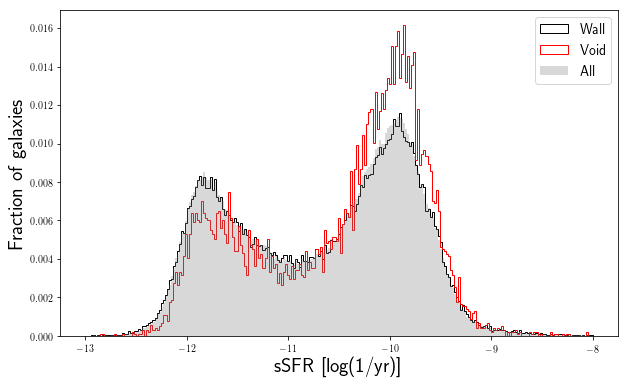

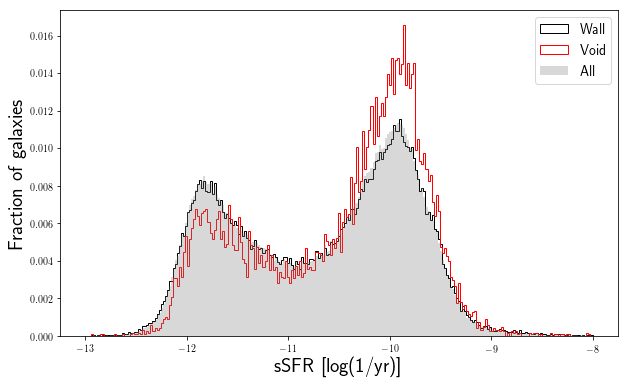

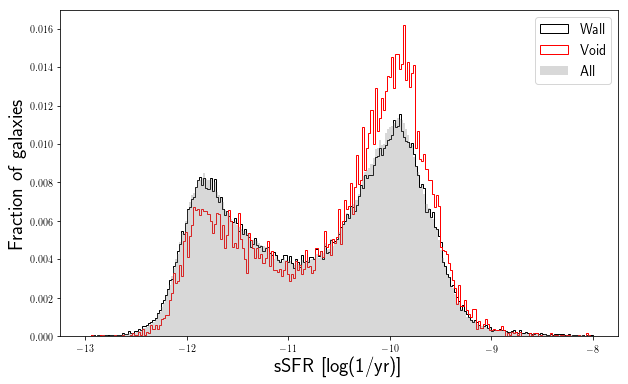

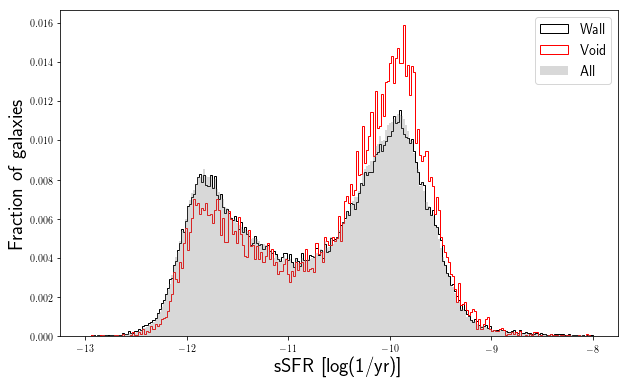

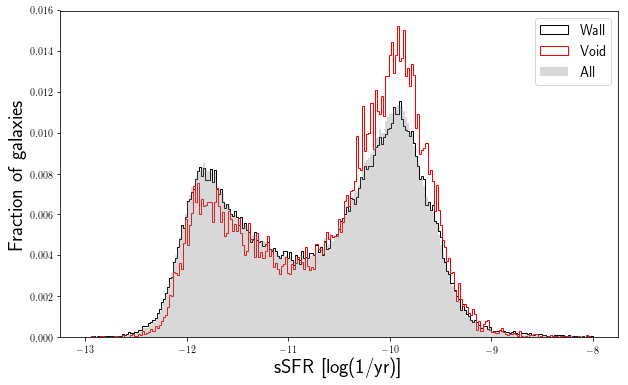

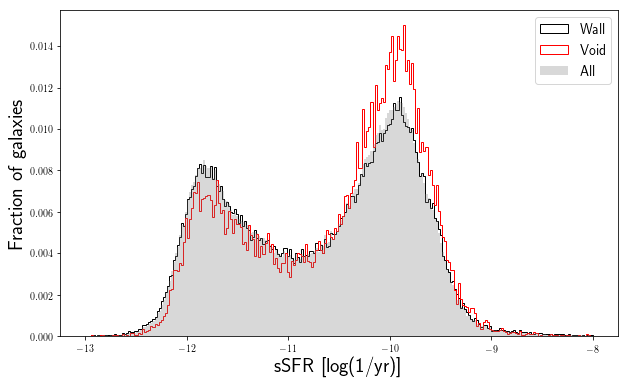

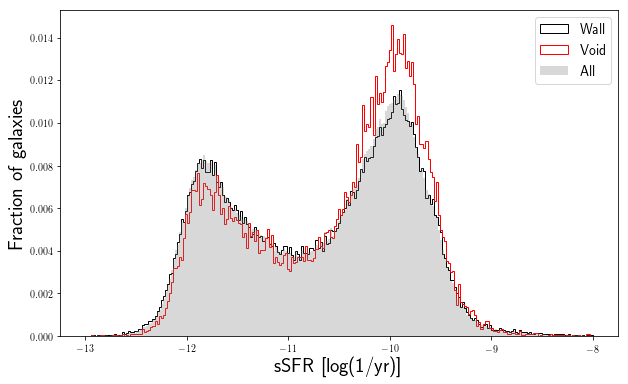

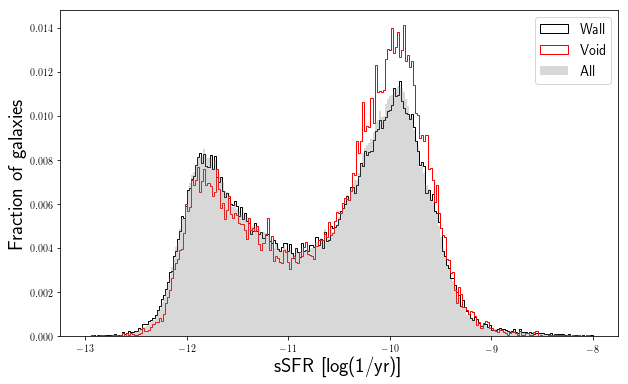

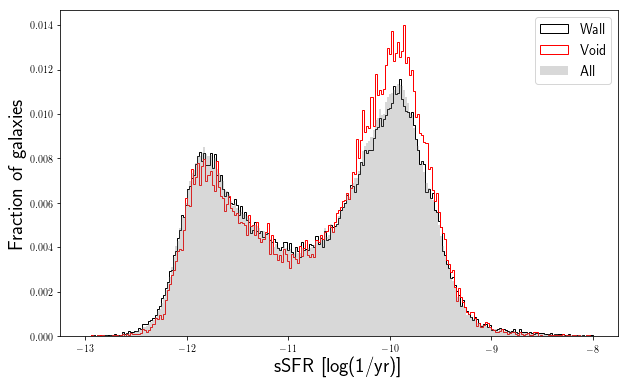

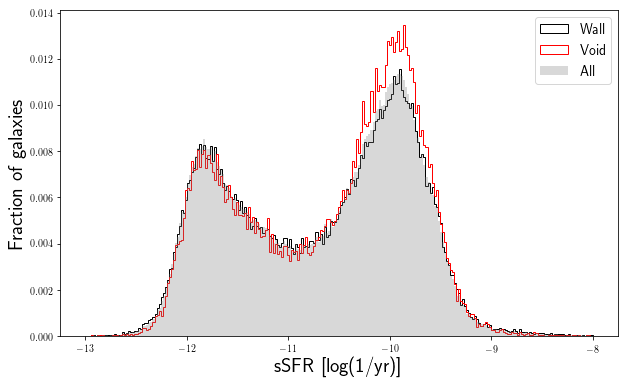

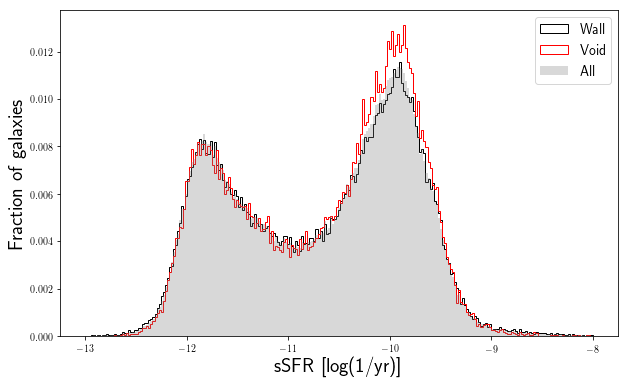

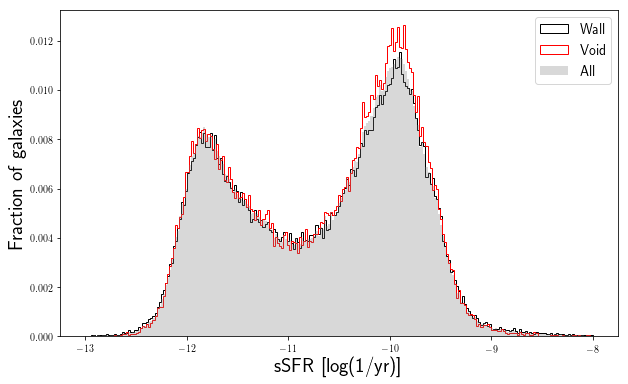

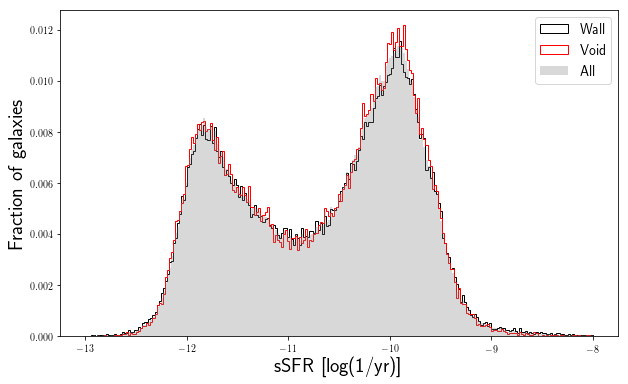

In [18]:
for i in range(len(ind_gal_depth_voidv2_new)):
#     char_inside(u_r,np.linspace(0,4, 250),i,'Color u_r - V^2',r'\boldmath$u-r$',x=0.2,y=0.016)
#     char_inside(Mstar,np.linspace(5.5,12.5, 250),i,r'\textbf{Star Mass - }\boldmath${V^{2}}$',r'\boldmath$M_{star} [ log(M_{sun}) ]$',x=6,y=0.8*0.019)
#     char_inside(Mstar,np.linspace(5.5,12.5, 250),i,r'\textbf{Star Mass - Voidfinder}',r'\boldmath$M_{star} [ log(M_{sun}) ]$',x=6,y=0.0178)
    char_inside(sSFR,np.linspace(-13,-8, 250),i,'specific star formation rate - V^2','sSFR [log(1/yr)] ',x=-12.7,y=0.0105)
# char_void(Mstar,np.linspace(5.5,12.5, 250),'Star Mass - void galaxies',r'\boldmath$Mstar [log(M_{sun})]$')
# CDF(Mstar,np.linspace(5.5,12.5, 700),'Cumulative Star Mass',r'\boldmath$Mstar [log(M_{sun})]$')

In [21]:
print("since the last picture still shows a difference between the void galaxies and the wall galaxies, what are the extra galaxies that are causing the shift to diseappear?")

since the last picture still shows a difference between the void galaxies and the wall galaxies, what are the extra galaxies that are causing the shift to diseappear?


In [ ]:
hd = fits.open('galdepth1.fits', format='ascii')
new_depths = Table(hd[1].data)

In [73]:
# for i in range(len(ind_gal_maximal_voidv2)):

#     char_inside(Mstar,np.linspace(5.5,12.5, 250),i,r'\textbf{Star Mass - }\boldmath${V^{2}}$',r'\boldmath$M_{star} [ log(M_{sun}) ]$',x=6,y=0.8*0.019)
#     char_inside(Mstar,np.linspace(5.5,12.5, 250),r'\textbf{Star Mass - Voidfinder}',r'\boldmath$M_{star} [ log(M_{sun}) ]$', voidfinder = True,x=6,y=0.0178)
# char_void(Mstar,np.linspace(5.5,12.5, 250),'Star Mass - void galaxies',r'\boldmath$Mstar [log(M_{sun})]$')
# CDF(Mstar,np.linspace(5.5,12.5, 700),'Cumulative Star Mass',r'\boldmath$Mstar [log(M_{sun})]$')

### Overlap

In [12]:
count1 =0
for i in wall_vf:
    if i in void_v2:
        count1+=1

In [13]:
count1/len(wall_vf) #70% of V^2 void galaxies are classified wall in voidfinder

0.504377285679029

In [14]:
len(wall_vf),len(void_v2) # around 200,000 for both

(222855, 376785)

In [15]:
count2=0
test=[]
for i in void_vf:
    if i in void_v2:
        count2+=1
    else:
        test.append(i)

In [16]:
count2/len(void_vf) # 68% of voidfinder voids galaxies are classified void in V^2, the leftover 32% are classified wall.

0.5359504404560532

In [17]:
len(void_vf), len(void_v2)

(45521, 376785)

In [18]:
count3=0
for i in test:
    if i in wall_v2:
        count3+=1

In [19]:
count3/len(test) # 95% of the 32% from above are classified wall by V^2

0.9819163037303541

#### Where do these 32% live? --- nowhere specific

In [20]:
#test # voidfinder void galaxies that are mostly classified as wall in V^2

In [29]:
len(test)

21124

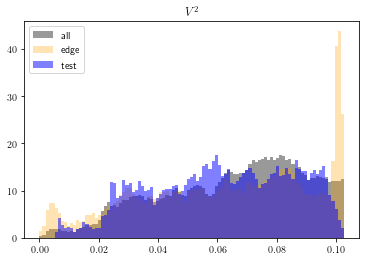

In [30]:
bins_=np.linspace(np.min(z),0.1026,100)
plt.hist(z[z< 0.1026],alpha=0.8,density=True,bins=bins_,label='all',color='gray')
plt.hist(z[edge_vf],bins=bins_,density=True,color='orange',label="edge",alpha=0.3)
plt.hist(z[test],bins=bins_,color='blue',density=True,label="test", alpha =0.5)

plt.legend()
plt.title(r"$V^{2}$")
plt.show()

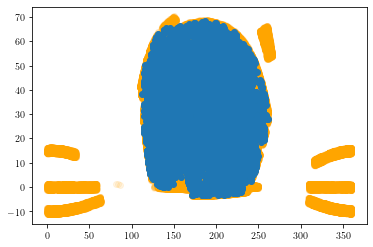

In [31]:
plt.scatter(ra[z< 0.1026], dec[z< 0.1026], color='orange', alpha=0.1)
plt.scatter(ra[test],dec[test])


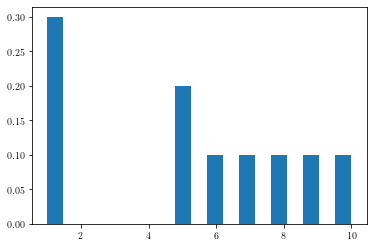

In [309]:
counts, bins = np.histogram([1,1,1,5,5,6,7,8,9,10], np.linspace(1,10, 20))
counts = np.array(counts)/ len(arr)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

### Plotting functions

In [767]:
# ax = plt.figure(figsize=(8,4))
# all = Mstar[data['redshift']< 0.1026]
# counts_wall, bins_wall = np.histogram(Mstar[wall_vf], np.linspace(5.5,12.5, 250))
# counts_void, bins_void = np.histogram(Mstar[void_vf], np.linspace(5.5,12.5, 250))
# counts_all, bins_all = np.histogram(all, np.linspace(5.5,12.5, 250))

# counts_wall,counts_void,counts_all = np.array(counts_wall)/ len(Mstar[wall_vf]),np.array(counts_void)/ len(Mstar[void_vf]),np.array(counts_all)/ len(all)
# # plt.hist(bins_wall[:-1], bins=bins_wall, weights=counts_wall)
# # plt.hist(bins_all[:-1], bins=bins_all, weights=counts_void)
# # plt.hist(bins_all[:-1], bins=bins_all, weights=counts_all)

# ax.plt.hist(bins_wall[:-1], bins=bins_wall, weights=counts_wall, label = 'Wall' , color='black', histtype='step')
# ax.hist(bins_void[:-1], bins=bins_void, weights=counts_void ,label = 'Void', color = 'red',histtype='step')
# ax.hist(bins_all[:-1], bins=bins_all, weights=counts_all,  label = 'All', color = 'gray',alpha = 0.3)
# ax.title('Star Mass - Voidfinder')
# ax.ylabel(r"$\frac{count}{total}=$ (Fraction)",fontsize=16)
# ax.legend()
# ax.show()

In [12]:
def char(char_, bins_, title='galaxy property', label='x-label', voidfinder=False,x=None,y=None):
    '''
    Plots a histogram for a galaxy charachterstic for wall and void galaxies
    
    arguments:
    
    char_ : (numpy array) charachteristic of galaxy desired for plotting
    bins_ : (numpy linear space) histogram bins
    voidfinder : (bool) True if the classification comes from the voidfinder algorithm, False if it comes from V^2
    x: x coordinate of the location of the algorithm's name 
    y: y coordinate of the location of the algorithm's name
    '''
    if voidfinder == True:
        char_wall = char_[wall_vf]
        char_void = char_[void_vf]
#         char_edge = char_[edge_vf]
#         char_out = char_[out_vf]
        x_vf=x
        y_vf=y
    else:
        char_wall = char_[wall_v2]
        char_void = char_[void_v2]
#         char_edge = char_[edge_v2]
#         char_out = char_[out_v2]
        x_v2=x
        y_v2=y
    fig, ax = plt.subplots(figsize=(10, 6))
    
    counts_wall, bins_wall = np.histogram(char_wall, bins= bins_)
    counts_void, bins_void = np.histogram(char_void, bins= bins_)
    
#     counts_edge, bins_edge = np.histogram(char_edge, bins= bins_)
#     counts_out, bins_out = np.histogram(char_out, bins= bins_)
    
    counts_all, bins_all = np.histogram(char_[data['redshift']< 0.1026], bins= bins_)
    
    
    counts_wall,counts_void = np.array(counts_wall)/len(char_wall), np.array(counts_void)/len(char_void)
#     counts_edge, counts_out = np.array(counts_edge)/len(char_edge), np.array(counts_out)/len(char_out)
    counts_all = np.array(counts_all)/len(char_[data['redshift']< 0.1026])
    
    ax.hist(bins_wall[:-1], bins=bins_wall, weights=counts_wall, label = 'Wall' , color='black', histtype='step')
    ax.hist(bins_void[:-1], bins=bins_void, weights=counts_void ,label = 'Void', color = 'red',histtype='step')
    
#     ax.hist(bins_edge[:-1], bins=bins_edge, weights=counts_edge ,label = 'Edge', color = 'green',histtype='step')
#     ax.hist(bins_out[:-1], bins=bins_out, weights=counts_out ,label = 'Out', color = 'purple',histtype='step')

    ax.hist(bins_all[:-1], bins=bins_all, weights=counts_all,  label = 'All', color = 'gray',alpha = 0.3)
    
    if (voidfinder == True) & (x!= None):
        ax.text(x_vf, y_vf, "VoidFinder", fontsize=20)
    if (voidfinder == False) & (x!= None):
        ax.text(x_v2, y_v2, r'\boldmath$V^{2}$', fontsize=20)
    
    ax.legend(fontsize=14)
#     plt.title(title, fontsize=18)
    ax.set_xlabel(label, fontsize=20)
    ax.set_ylabel(r"Fraction of galaxies",fontsize=20)
    
    if label == 'Absolute Magnitude' or label == 'Absolute Magnitude - NSA':
        ax.set_xlim(-12, -24) 
    
#     plt.savefig('figures/'+title+".png")
    plt.show()
    
    


In [13]:
def char_void(char_, bins_, title='galaxy property', label='x-label'):
    '''
    Plots a histogram for a galaxy charachterstic for void galaxies only for both algorithms
    
    arguments:
    
    char_ : (numpy array) charachteristic of galaxy desired for plotting
    bins_ : (numpy linear space) histogram bins
    '''
    char_void_vf = char_[void_vf]
    char_void_v2 = char_[void_v2]
    
    fig, ax = plt.subplots(figsize=(10, 6)) # 8,4
    
#     plt.hist(char_void_vf, label = 'Voidfinder void galaxies' ,bins= bins_,alpha = 0.6, density = True, color='green')
#     plt.hist(char_void,  label = 'V^2 void galaxies',bins= bins_, color = 'blue',alpha = 0.4, density = True)
#     plt.hist(char_[data['redshift']< 0.1026],  label = 'All galaxies',bins= bins_, color = 'gray',alpha = 0.6, density = True)

#     plt.legend()
#     plt.title(title)
#     plt.xlabel(label)    
    
#     plt.savefig('figures/'+title+".png")
#     plt.show()
    
    
    counts_void_vf, bins_void_vf = np.histogram(char_void_vf, bins= bins_)
    counts_void_v2, bins_void_v2 = np.histogram(char_void_v2, bins= bins_)
    counts_all, bins_all = np.histogram(char_[data['redshift']< 0.1026], bins= bins_)
    
    counts_void_vf,counts_void_v2 = np.array(counts_void_vf)/len(char_void_vf), np.array(counts_void_v2)/len(char_void_v2)
    counts_all = np.array(counts_all)/len(char_[data['redshift']< 0.1026])
    
    ax.hist(bins_void_vf[:-1], bins=bins_void_vf, weights=counts_void_vf, label = 'Voidfinder void galaxies' , color='red', histtype='step')
    ax.hist(bins_void_v2[:-1], bins=bins_void_v2, weights=counts_void_v2 ,label = r'$V^{2}$ void galaxies', color = 'blue',histtype='step')
    ax.hist(bins_all[:-1], bins=bins_all, weights=counts_all,  label = 'All', color = 'gray',alpha = 0.3)
    
    
    ax.legend(fontsize=14)
#     plt.title(title, fontsize=18)
    ax.set_xlabel(label, fontsize=20)
    ax.set_ylabel(r"Fraction of galaxies",fontsize=20)
    
    if label == 'Absolute Magnitude' or label == 'Absolute Magnitude - NSA':
        ax.set_xlim(-12, -24) 
        
#     plt.savefig('figures/'+title+".png")
    plt.show()

In [14]:
def CDF(char_, bins_, title='galaxy property', label='x-label'):
    '''
    Plots the cumulative distribution for void,wall galaxies for both algorithms for a given galaxy property
    
    arguments:
    
    char_ : (numpy array) charachteristic of galaxy desired for plotting
    bins_ : (numpy linear space) histogram bins
    '''

    fig, ax = plt.subplots(figsize=(20, 6))

    ax.hist(char_[void_vf].flatten(), bins=bins_, density=True, histtype='step', label='VoidFinder Void', cumulative=True, color='red')
    ax.hist(char_[wall_vf].flatten(), bins=bins_, density=True, histtype='step', label='VoidFinder Wall',cumulative=True, color='red',linestyle='-.')
    ax.hist(char_[void_v2], bins=bins_, density=True, histtype='step', label= r'$V^{2}$ Void',cumulative=True, color='blue')
    ax.hist(char_[wall_v2], bins=bins_, density=True, histtype='step', label= r'$V^{2}$ Wall',cumulative=True,linestyle='-.', color='blue')
    ax.hist(char_[data['redshift']< 0.1026], bins=bins_, density=True, histtype='step', label='All galaxies',cumulative=True, color='gray')

    ax.grid(True)
    ax.legend(loc='upper right',fontsize=18)
#     ax.set_title(title)
    ax.set_xlabel(label,fontsize=20)
    ax.set_ylabel('Likelihood of occurrence',fontsize=20)

    if label == 'Absolute Magnitude' or label == 'Absolute Magnitude - NSA':
        ax.set_xlim(-12, -24) 
        
#     plt.savefig('figures/'+title+".png")
    plt.show()

#### Star Mass

In [ ]:
# make axis ticks numbers larger , "at least" as large as the figure caption
# try different bin sizes , widen a little? double?
# Wall line = dashed / try filling both wall and void / line size on wall thicker than line size in void -- distinguish in Black white
#axis limits to where data is
# should we include CDFs? maybe not (no KS)
# color and linestyle for each class (V2 wall, void , VF void, wall) = 4 colors, 2 linestyles
# Msun - $M_{\odot}$ , Mstar
# log Mstar/Mdot aboe
# unbold axis titles
# serif font , same font throughout plot
# x,y axis ranges accross parameters
# save in eps

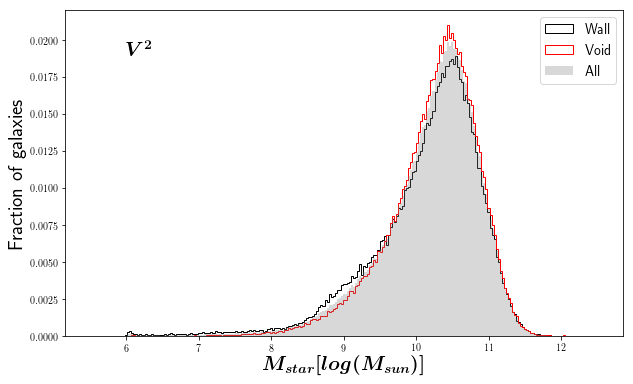

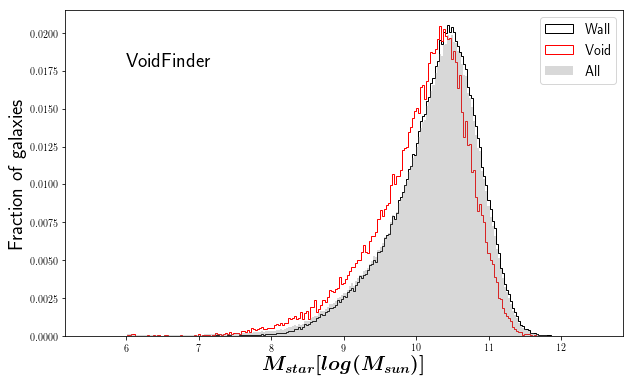

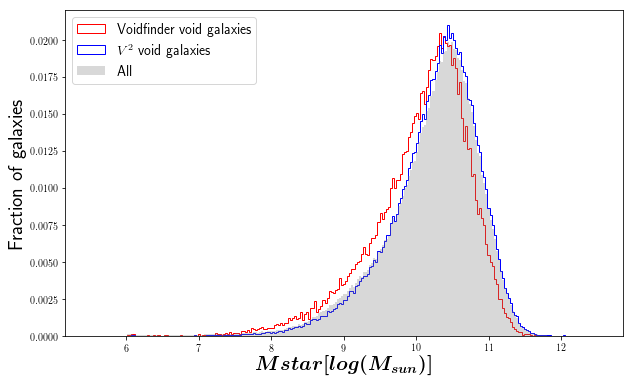

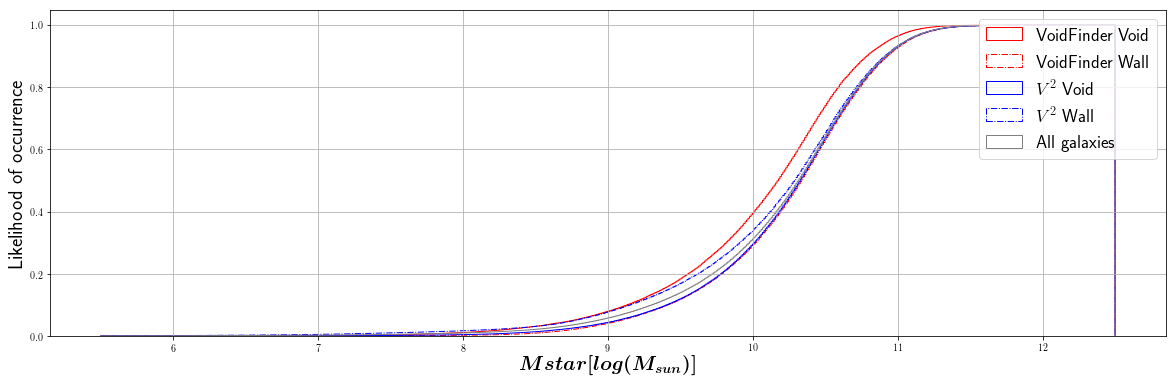

In [11]:
char(Mstar,np.linspace(5.5,12.5, 250),r'\textbf{Star Mass - }\boldmath${V^{2}}$',r'\boldmath$M_{star} [ log(M_{sun}) ]$',x=6,y=0.019)
char(Mstar,np.linspace(5.5,12.5, 250),r'\textbf{Star Mass - Voidfinder}',r'\boldmath$M_{star} [ log(M_{sun}) ]$', voidfinder = True,x=6,y=0.0178)
char_void(Mstar,np.linspace(5.5,12.5, 250),'Star Mass - void galaxies',r'\boldmath$Mstar [log(M_{sun})]$')
CDF(Mstar,np.linspace(5.5,12.5, 700),'Cumulative Star Mass',r'\boldmath$Mstar [log(M_{sun})]$')



#### Star Mass _ NSA

In [1]:
# char(np.log10(Mstar_NSA),np.linspace(5.5,12.5, 250),r'\textbf{Star Mass NSA - }\boldmath$V^{2}$',r'\boldmath$M_{star-NSA} [log(M_{sun})]$',x=6,y=0.0055)
# char(np.log10(Mstar_NSA),np.linspace(5.5,12.5, 250),'$Star Mass_{NSA} - VoidFinder$',r'\boldmath$M_{star-NSA} [log(M_{sun})]$', voidfinder = True,x=6,y=0.0055)
# char_void(np.log10(Mstar_NSA),np.linspace(5.5,12.5, 250),'$Star Mass_{NSA}- void galaxies$',r'\boldmath$M_{star-NSA} [log(M_{sun})]$')
# CDF(np.log10(Mstar_NSA),np.linspace(5.5,12.5, 700),'$Cumulative Star Mass_{NSA}$',r'\boldmath$M_{star-NSA} [log(M_{sun})]$')

#### Color u_r

In [70]:
# make axis ticks numbers larger , "at least" as large as the figure caption
# try different bin sizes , widen a little? double?
# Wall line = dashed / try filling both wall and void / line size on wall thicker than line size in void -- distinguish in Black white
#axis limits to where data is
# should we include CDFs? maybe not (no KS)
# color and linestyle for each class (V2 wall, void , VF void, wall) = 4 colors, 2 linestyles
# Msun - $M_{\odot}$ , Mstar
# log Mstar/Mdot aboe
# unbold axis titles
# serif font , same font throughout plot
# x,y axis ranges accross parameters
# save in eps

In [71]:
char(u_r,np.linspace(0,4, 500),'Color u_r - V^2',r'\boldmath$u-r$',x=0.2,y=0.016)
char(u_r,np.linspace(0,4, 500),'Color u_r - Voidfinder',r'\boldmath$u-r$', voidfinder = True,x=0.2,y=0.016)
char_void(u_r,np.linspace(0,4, 500),'Color u_r - void galaxies',r'\boldmath$u-r$')
CDF(u_r,np.linspace(0,4, 700),'Cumulative Color u_r',r'\boldmath$u-r$')


NameError: name 'char' is not defined

#### Color u_r _NSA

In [ ]:
The conclusions from VF are in line with the literature that indicates that void galaxies are retarded in their star formation because they evolve in an environment with fewer interactions (mergers, tidal stripping etc) compared to wall galaxies. 
V2 does not make the same prediction because it grows voids farther into the walls which leads to the contamination of the classification


In [2]:
# char(u_r_NSA,np.linspace(-1,4, 250),'Color u_r V^2',r'\boldmath$u-r$ \textrm{(NSA)}',x=-0.5,y=0.005)
# char(u_r_NSA,np.linspace(-1,4, 250),'Color u_r-NSA- Voidfinder',r'\boldmath$u-r$ \textrm{(NSA)}', voidfinder = True,x=-0.5,y=0.0055)
# char_void(u_r_NSA,np.linspace(-1,4, 250),'Color u_r -NSA- void galaxies',r'\boldmath$u-r$ \textrm{(NSA)}')
# CDF(u_r_NSA,np.linspace(-1,4, 700),'Cumulative Color u_r-NSA',r'\boldmath$u-r$ \textrm{(NSA)}')


#### Color g_r 

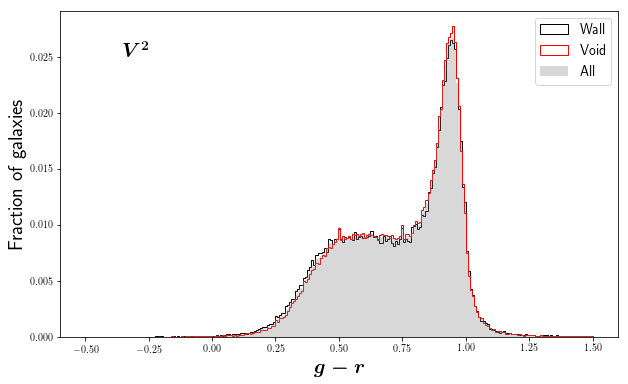

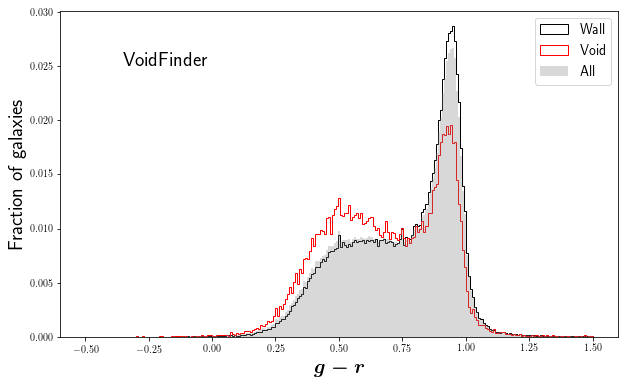

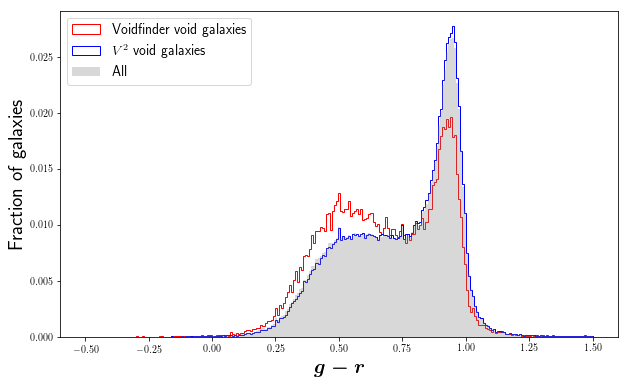

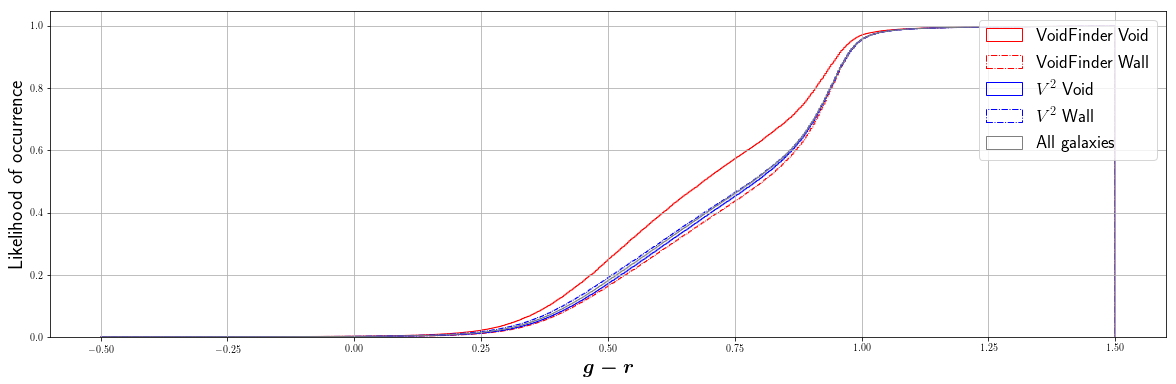

In [15]:
char(g_r,np.linspace(-0.5,1.5, 250),'Color g_r - V^2',r'\boldmath$g-r$',x=-0.35,y=0.025)
char(g_r,np.linspace(-0.5,1.5, 250),'Color g_r - Voidfinder',r'\boldmath$g-r$', voidfinder = True,x=-0.35,y=0.025)
char_void(g_r,np.linspace(-0.5,1.5, 250),'Color g_r - void galaxies',r'\boldmath$g-r$')
CDF(g_r,np.linspace(-0.5,1.5, 700),'Cumulative Color g_r',r'\boldmath$g-r$')

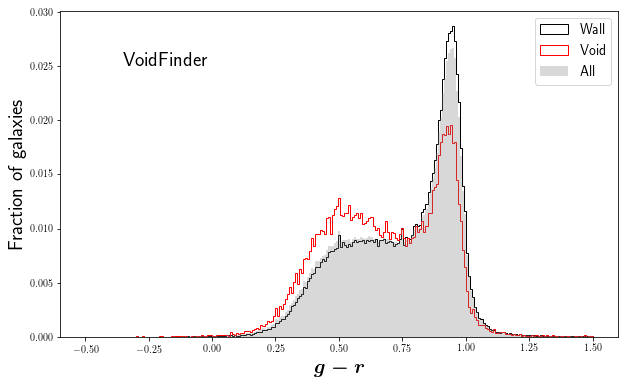

In [17]:
# char(g_r,np.linspace(-0.5,1.5, 250),'Color g_r - V^2',r'\boldmath$g-r$',x=-0.35,y=0.025)
char(g_r,np.linspace(-0.5,1.5, 250),'Color g_r - Voidfinder',r'\boldmath$g-r$', voidfinder = True,x=-0.35,y=0.025)
# char_void(g_r,np.linspace(-0.5,1.5, 250),'Color g_r - void galaxies',r'\boldmath$g-r$')
# CDF(g_r,np.linspace(-0.5,1.5, 700),'Cumulative Color g_r',r'\boldmath$g-r$')

#### Color g_r _NSA

In [3]:
# char(g_r_NSA,np.linspace(-0.5,1.3, 250),'Color g_r-NSA - V^2',r'\boldmath$g-r$ \textrm{(NSA)}',x=-0.35,y=0.0055)
# char(g_r_NSA,np.linspace(-0.5,1.3, 250),'Color g_r-NSA - Voidfinder',r'\boldmath$g-r$ \textrm{(NSA)}', voidfinder = True,x=-0.35,y=0.005)
# char_void(g_r_NSA,np.linspace(-0.5,1.3, 250),'Color g_r -NSA- void galaxies',r'\boldmath$g-r$ \textrm{(NSA)}')
# CDF(g_r_NSA,np.linspace(-0.5,1, 700),'Cumulative Color g_r-NSA',r'\boldmath$g-r$ \textrm{(NSA)}')

#### Absolute magnitude

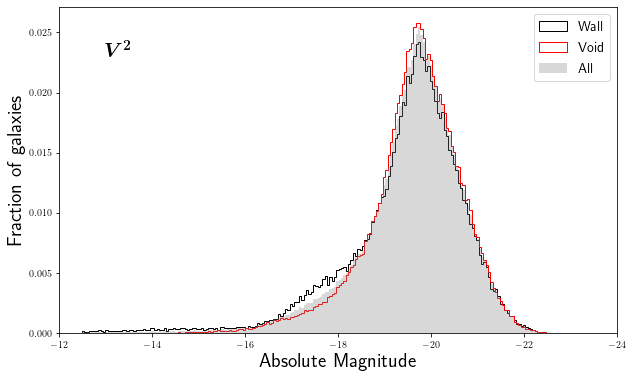

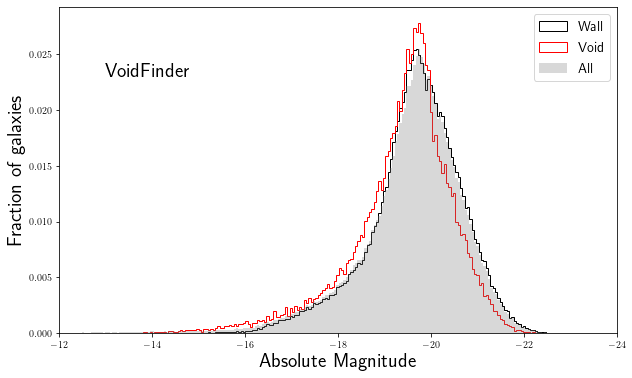

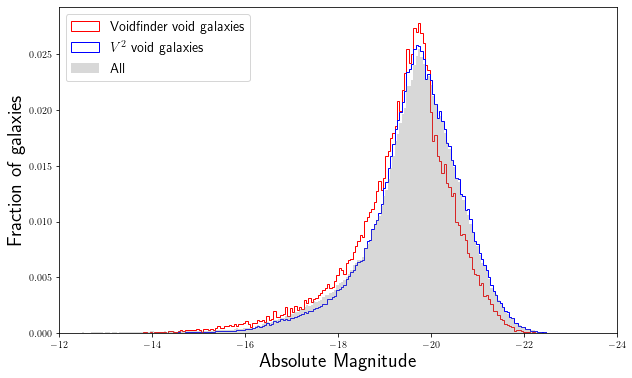

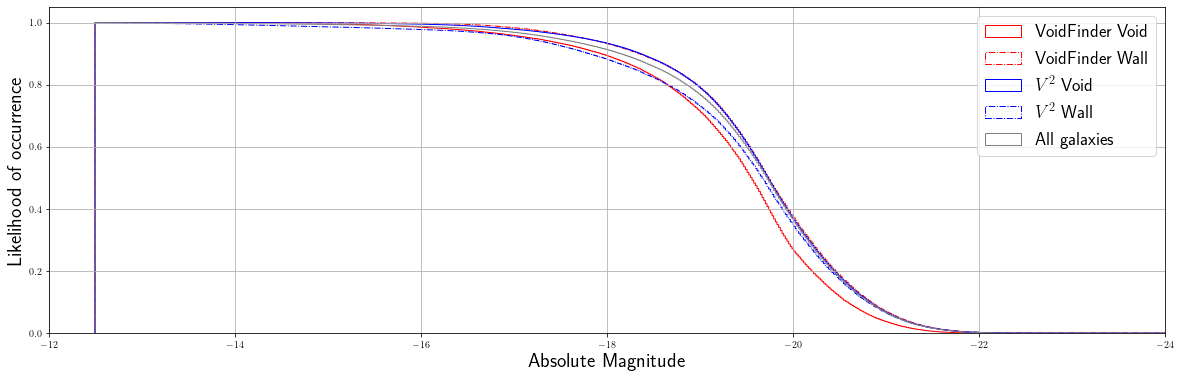

In [13]:
char(rabsmag,np.linspace(-25,-12.5, 250),'Absolute Magnitude - V^2','Absolute Magnitude',x=-13,y=0.023)
char(rabsmag,np.linspace(-25,-12.5, 250),'Absolute Magnitude - Voidfinder','Absolute Magnitude', voidfinder = True,x=-13,y=0.023)
char_void(rabsmag,np.linspace(-25,-12.5, 250),'Absolute Magnitude- void galaxies','Absolute Magnitude')
CDF(rabsmag,np.linspace(-25,-12.5, 700),'Cumulative Absolute Magnitude','Absolute Magnitude')

#### Absolute magnitude _NSA

In [4]:
# char(rabsmag_NSA,np.linspace(-25,-12.5, 250),'Absolute Magnitude_NSA - V^2','Absolute Magnitude - NSA',x=-13,y=0.0052)
# char(rabsmag_NSA,np.linspace(-25,-12.5, 250),'Absolute Magnitude_NSA - Voidfinder','Absolute Magnitude - NSA', voidfinder = True,x=-13,y=0.0052)
# char_void(rabsmag_NSA,np.linspace(-25,-12.5, 250),'Absolute Magnitude_NSA- void galaxies','Absolute Magnitude - NSA')
# CDF(rabsmag_NSA,np.linspace(-25,-12.5, 700),'Cumulative Absolute Magnitude_NSA','Absolute Magnitude - NSA')

#### Star Formation Rate

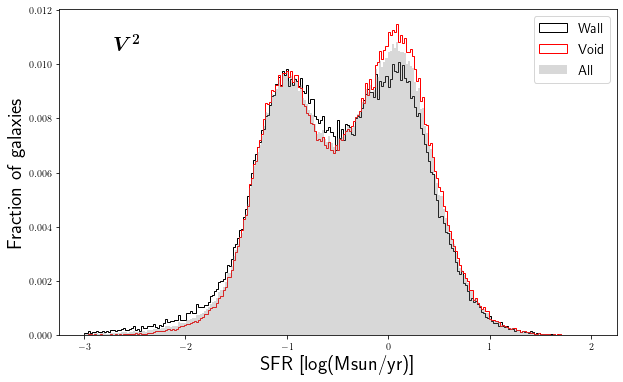

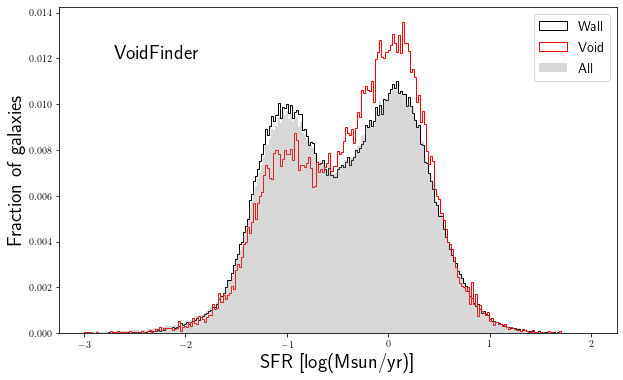

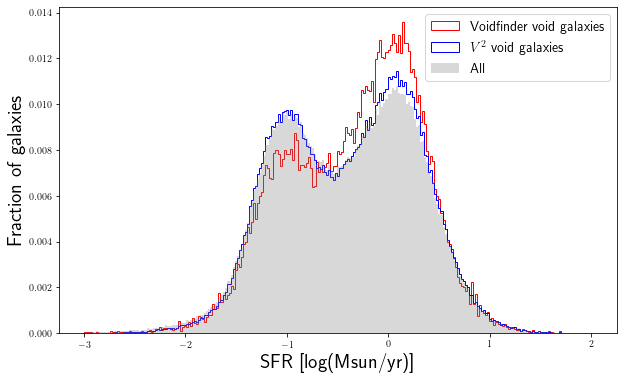

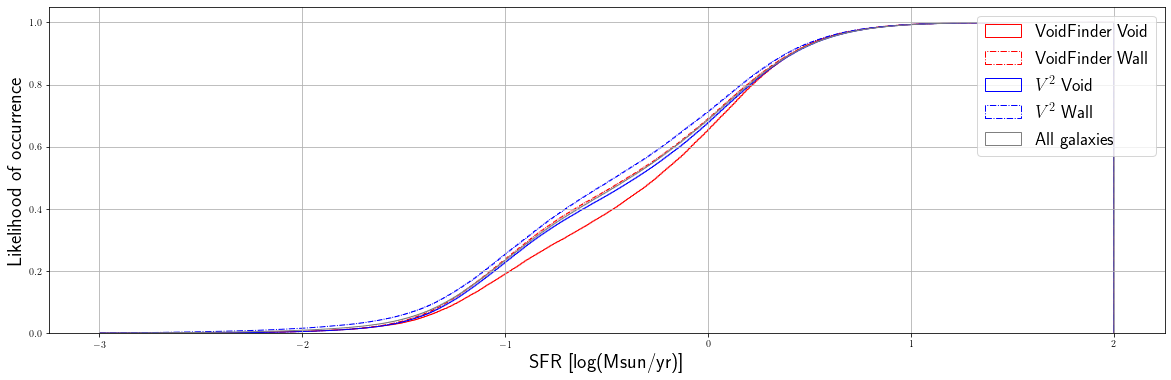

In [14]:
char(SFR,np.linspace(-3,2, 250),'star formation rate - V^2','SFR [log(Msun/yr)]',x=-2.7,y=0.0105)
char(SFR,np.linspace(-3,2, 250),'star formation rate - Voidfinder','SFR [log(Msun/yr)]', voidfinder = True,x=-2.7,y=0.012)
char_void(SFR,np.linspace(-3,2, 250),'star formation rate- void galaxies','SFR [log(Msun/yr)]')
CDF(SFR,np.linspace(-3,2, 700),'Cumulative star formation rate','SFR [log(Msun/yr)]')

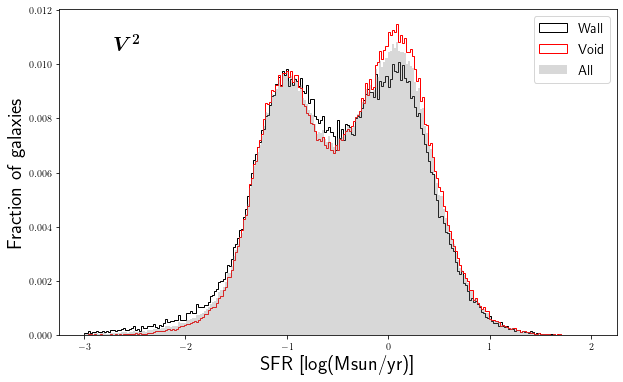

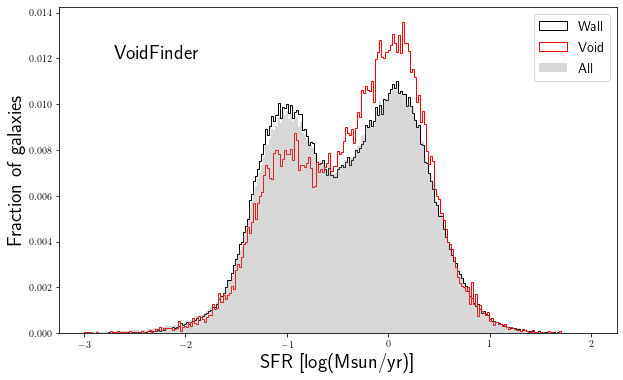

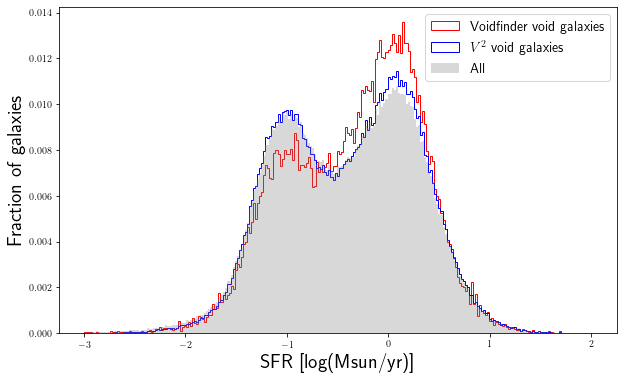

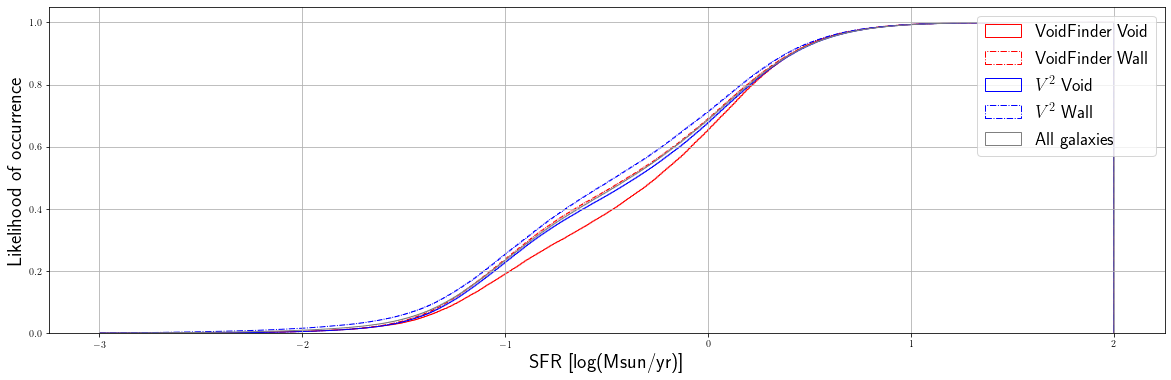

In [15]:
char(SFR,np.linspace(-3,2, 250),'star formation rate - V^2','SFR [log(Msun/yr)]',x=-2.7,y=0.0105)
char(SFR,np.linspace(-3,2, 250),'star formation rate - Voidfinder','SFR [log(Msun/yr)]', voidfinder = True,x=-2.7,y=0.012)
char_void(SFR,np.linspace(-3,2, 250),'star formation rate- void galaxies','SFR [log(Msun/yr)]')
CDF(SFR,np.linspace(-3,2, 700),'Cumulative star formation rate','SFR [log(Msun/yr)]')

#### Specific star Formation Rate

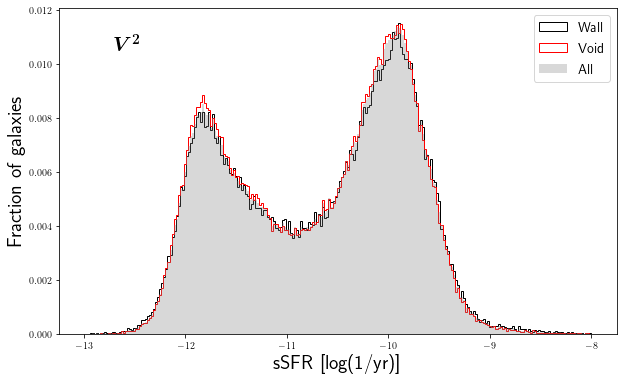

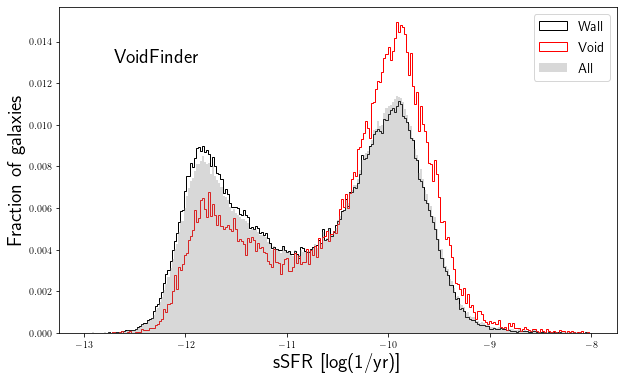

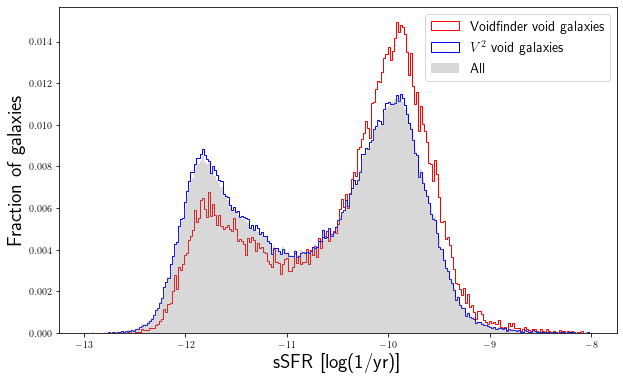

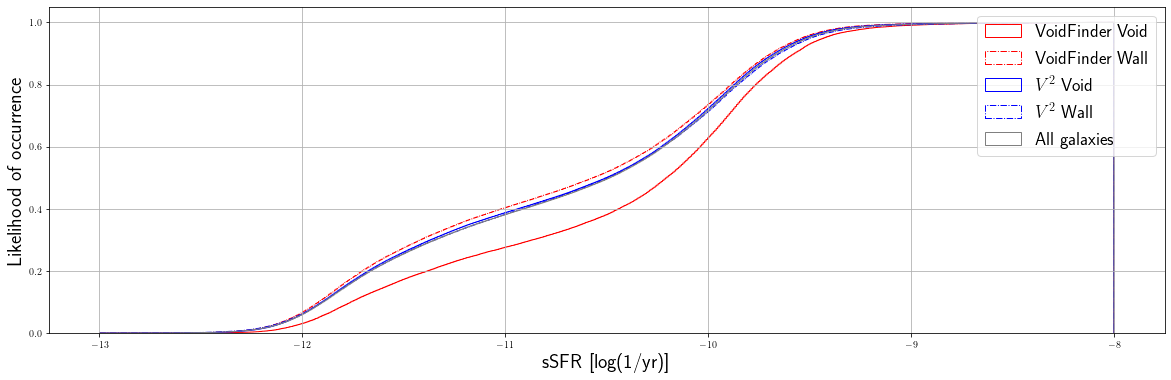

In [17]:
char(sSFR,np.linspace(-13,-8, 250),'specific star formation rate - V^2','sSFR [log(1/yr)] ',x=-12.7,y=0.0105)
char(sSFR,np.linspace(-13,-8, 250),'specific star formation rate - Voidfinder','sSFR [log(1/yr)]', voidfinder = True,x=-12.7,y=0.013)
char_void(sSFR,np.linspace(-13,-8, 250),'specific star formation rate- void galaxies','sSFR [log(1/yr)] ')
CDF(sSFR,np.linspace(-13,-8, 700),'Cumulative specific star formation rate','sSFR [log(1/yr)] ')

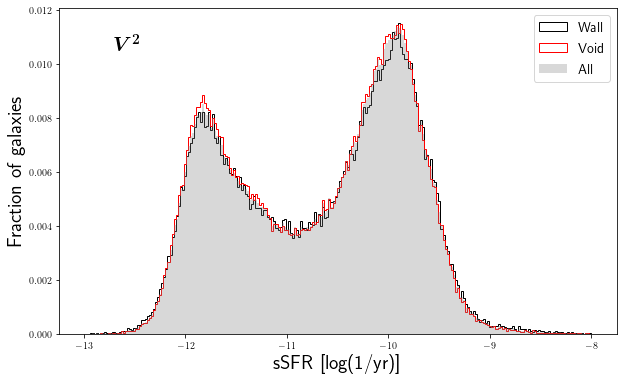

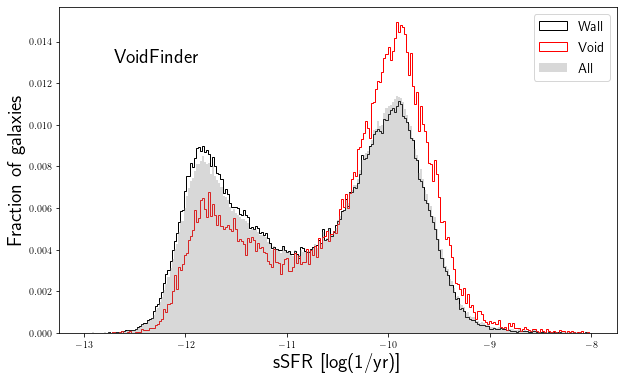

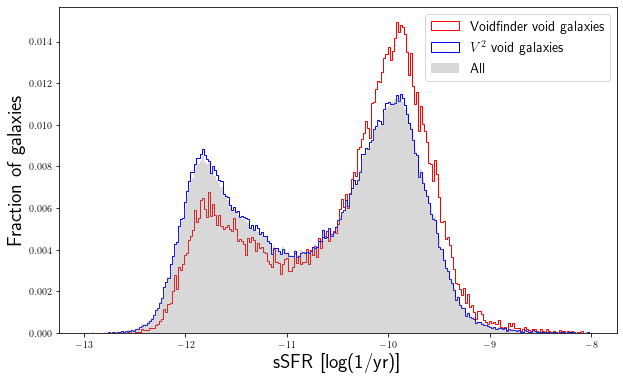

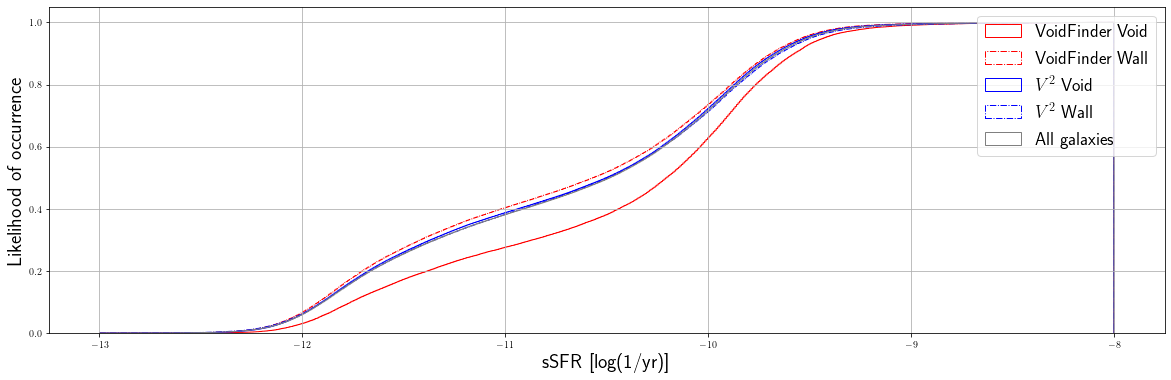

In [18]:
char(sSFR,np.linspace(-13,-8, 250),'specific star formation rate - V^2','sSFR [log(1/yr)] ',x=-12.7,y=0.0105)
char(sSFR,np.linspace(-13,-8, 250),'specific star formation rate - Voidfinder','sSFR [log(1/yr)]', voidfinder = True,x=-12.7,y=0.013)
char_void(sSFR,np.linspace(-13,-8, 250),'specific star formation rate- void galaxies','sSFR [log(1/yr)] ')
CDF(sSFR,np.linspace(-13,-8, 700),'Cumulative specific star formation rate','sSFR [log(1/yr)] ')

### KS tests

In [31]:
def KS(char_, void_void=False,void_wall=False,wall_wall=False,voidfinder=False,v2=False):
    '''
    char_: array of galaxy property
    void_void: True if we want to calculate the KS test between two void galaxy samples
    void_wall: True if we want to calculate the KS test between void and wall galaxy samples
    voidfinder : True only if void_wall is True and classification from voidfinder is used
    '''
    #void_wall
    if (void_wall and voidfinder):
        return stats.ks_2samp(char_[wall_vf], char_[void_vf]) 
    if (void_wall and v2):
        return stats.ks_2samp(char_[wall_v2], char_[void_v2]) 
    
    #void_void
    if void_void:
        return stats.ks_2samp(char_[void_vf], char_[void_v2]) 

    # wall_wall
    if wall_wall:
        return stats.ks_2samp(char_[wall_vf], char_[wall_v2]) 



In [35]:
def KS_table(char_):
    '''
    output: two numbers for each cell: kS Test statistic and p-value
    
    diagonals are void_void and wall_wall, row2col1 is void_wall for voidfinder,  and row1col2 is void_wall for V^2
    '''
    a_1_1 = tuple(KS(char_,void_void=True)) #1_1
    a_2_1 = tuple(KS(char_,void_wall=True,voidfinder=True))

    a_1_2 = tuple(KS(char_,void_wall=True,v2=True))
    a_2_2 = tuple(KS(char_,wall_wall=True)) 

    col1=[a_1_1,a_2_1]
    
    col2=[a_1_2,a_2_2]
    

    
    return Table([col1,col2], names=('voidfinder','v_squared'))


In [56]:
print(stats.ks_2samp(Mstar[void_vf], Mstar[wall_v2]) )
print(stats.ks_2samp(u_r[void_vf], u_r[wall_v2]) )
print(stats.ks_2samp(g_r[void_vf], g_r[wall_v2]) )
print(stats.ks_2samp(rabsmag[void_vf], rabsmag[wall_v2]) )
print(stats.ks_2samp(SFR[void_vf], SFR[wall_v2]) )
print(stats.ks_2samp(sSFR[void_vf], sSFR[wall_v2])) 

Ks_2sampResult(statistic=0.09737432984377059, pvalue=9.596518308845177e-277)
Ks_2sampResult(statistic=0.0974511063843424, pvalue=3.517261688586993e-277)
Ks_2sampResult(statistic=0.09735619756826153, pvalue=1.2162194642940036e-276)
Ks_2sampResult(statistic=0.06347187632710183, pvalue=7.88210948369142e-118)
Ks_2sampResult(statistic=0.09303149284014245, pvalue=1.2017203629488489e-252)
Ks_2sampResult(statistic=0.08821650698776451, pvalue=3.253512720093948e-227)


In [59]:
print(stats.ks_2samp(Mstar[wall_v2], Mstar[wall_vf]) )
print(stats.ks_2samp(u_r[wall_v2], u_r[wall_vf]) )
print(stats.ks_2samp(g_r[wall_v2], g_r[wall_vf]) )
print(stats.ks_2samp(rabsmag[wall_v2], rabsmag[wall_vf]) )
print(stats.ks_2samp(SFR[wall_v2], SFR[wall_vf]) )
print(stats.ks_2samp(sSFR[wall_v2], sSFR[wall_vf])) 

Ks_2sampResult(statistic=0.06905365180479675, pvalue=0.0)
Ks_2sampResult(statistic=0.04061800208835664, pvalue=1.0664370213578124e-116)
Ks_2sampResult(statistic=0.04387652575658352, pvalue=4.2065027361769384e-136)
Ks_2sampResult(statistic=0.09127565178886077, pvalue=0.0)
Ks_2sampResult(statistic=0.03518965229369064, pvalue=1.0705447985007178e-87)
Ks_2sampResult(statistic=0.036294646464199665, pvalue=2.9021058099386363e-93)


In [44]:
KS_table(sSFR)

voidfinder [2],v_squared [2]
float64,float64
0.11063584061143517 .. 0.0,0.03529738868550192 .. 1.2314651729235756e-85
0.1204748760652663 .. 0.0,0.036294646464199665 .. 2.9021058099386363e-93


In [774]:
#void-void      void-wall-v2
#void-wall-vf   wall-wall

In [775]:
# decide how to interpret KS test, compare to critical value, p-value? ...

In [776]:
def critical_value(n,m,alpha=0.000000000000000000000000000000000000000001):
    '''
    calculates critical value: if the test statistic is larger than this then the null hypothesis can be rejected 
    at level alpha.
    n: size of sample 1
    m: size of sample 2
    '''
    
    return np.sqrt(-np.log(alpha/2)*(1/2))*np.sqrt((n+m)/(n*m))

In [595]:
critical_value(len(Mstar[wall_vf]),len(Mstar[void_vf])), critical_value(len(Mstar[wall_v2]),len(Mstar[void_v2]))

(0.035894099904138624, 0.02486973838113133)

In [583]:
critical_value(len(Mstar[data['redshift']< 0.1026]),len(Mstar[void_vf])), critical_value(len(Mstar[data['redshift']< 0.1026]),len(Mstar[void_v2]))

(0.006748918330462532, 0.003741446596947954)

In [ ]:
#next: understand hypothesis testing, what does it mean for the hypothesis to be rejected the X% level?
# write statistics paragraph for stellar mass

### Calculate averages and medians

In [13]:
def remove_nan(array):
    return array[np.logical_not(np.isnan(array))]

In [14]:
def stats(char_,voidfinder =False):
    '''
    char : array with galaxy properties e.g : Mstar
    voidfinder : true if we want to calculate the statistics of voidfinder data and not V^2 data
    
    note 1 : shifts are taken as void-wall
    note 2: percent difference are calculated with respect to the wall distribution
    
    returns: average, std of average, average shift, std of average shift, percent diff of avg , median, median shift, 
    percent diff of median
    '''
    if voidfinder==True:
        char_void= remove_nan(char_[void_vf])
        char_wall=remove_nan(char_[wall_vf])
        
    else:
        char_void= remove_nan(char_[void_v2])
        char_wall=remove_nan(char_[wall_v2])
        
    avg_void = np.mean(char_void)
    avg_wall = np.mean(char_wall)
        
    avg_shift=  avg_wall-avg_void
        
    std_avg_void = np.std(char_void,ddof=1)/np.sqrt(len(char_void))
    std_avg_wall = np.std(char_wall,ddof=1)/np.sqrt(len(char_wall))
    
    std_avg_shift = np.sqrt(std_avg_void**2 + std_avg_wall**2)
        
    percent_diff_avg = (avg_shift/avg_wall)*100
    
    median_wall = np.median(char_wall)
    median_void = np.median(char_void)
    
    median_shift = median_wall-median_void
    
    percent_diff_median = (median_shift/median_wall)*100
    
    print('average void : %f +- %f' %(avg_void, std_avg_void))
    print('average wall :  %f +- %f'%(avg_wall, std_avg_wall))
    print('average shift w.r.t wall :  %f +- %f'%(avg_shift, std_avg_shift))
    print('percent difference in avg w.r.t wall : ', percent_diff_avg)
    print('median void : ', median_void)
    print('median wall : ', median_wall)
    print('median shift w.r.t wall: ', median_shift)
    print('percent difference in median w.r.t wall : ', percent_diff_median)


In [25]:
stats(sSFR, voidfinder=True)


average void : -10.451034 +- 0.003962
average wall :  -10.724633 +- 0.001909
average shift w.r.t wall :  -0.273599 +- 0.004398
percent difference in avg w.r.t wall :  2.5511244529926858
median void :  -10.201032638549805
median wall :  -10.563491821289062
median shift w.r.t wall:  -0.3624591827392578
percent difference in median w.r.t wall :  3.4312440324777658


In [27]:
stats(sSFR)

average void : -10.702911 +- 0.001973
average wall :  -10.652602 +- 0.002572
average shift w.r.t wall :  0.050309 +- 0.003242
percent difference in avg w.r.t wall :  -0.4722709265591281
median void :  -10.517784595489502
median wall :  -10.457787990570068
median shift w.r.t wall:  0.059996604919433594
percent difference in median w.r.t wall :  -0.5737026316992978


In [832]:
stats(sSFR, voidfinder=True)


average void : -10.451034 +- 0.003962
average wall :  -10.724633 +- 0.001909
average shift w.r.t wall :  -0.273599 +- 0.004398
percent difference in avg w.r.t wall :  2.5511244529926858
median void :  -10.201032638549805
median wall :  -10.563491821289062
median shift w.r.t wall:  -0.3624591827392578
percent difference in median w.r.t wall :  3.4312440324777658


In [829]:
stats(SFR)

average void : -0.384173 +- 0.001510
average wall :  -0.509991 +- 0.002095
average shift w.r.t wall :  -0.125818 +- 0.002583
percent difference in avg w.r.t wall :  24.6706388562237
median void :  -0.324832558631897
median wall :  -0.4944124221801758
median shift w.r.t wall:  -0.1695798635482788
percent difference in median w.r.t wall :  34.29927241724518


In [724]:
from pprint import pprint
pprint ([(i, stats.ks_2samp(Mstar[void_vf][:i], Mstar[void_v2][:i])[1]) for i in range(28030,28050,1)])

[(28030, 1e-323),
 (28031, 1e-323),
 (28032, 1e-323),
 (28033, 1e-323),
 (28034, 1e-323),
 (28035, 1e-323),
 (28036, 0.0),
 (28037, 0.0),
 (28038, 0.0),
 (28039, 0.0),
 (28040, 0.0),
 (28041, 0.0),
 (28042, 0.0),
 (28043, 0.0),
 (28044, 0.0),
 (28045, 0.0),
 (28046, 0.0),
 (28047, 0.0),
 (28048, 0.0),
 (28049, 0.0)]


In [731]:
print(len(remove_nan(Mstar)[(remove_nan(Mstar)>10)]))

542611


In [735]:
stats.ks_2samp(Mstar[wall_v2][Mstar[wall_v2]<10], Mstar[void_v2][Mstar[void_v2]<10]) #V^2

Ks_2sampResult(statistic=0.08318112786478526, pvalue=0.0)

In [52]:
from scipy.stats import norm
sigma = norm.isf(10**(-200))

In [53]:
sigma

30.20559417957964